In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import sys
import argparse
import os
import numpy as np
from numpy.random import uniform
import pandas as pd
from itertools import product
import datetime
import glob
import re
%matplotlib inline
# %matplotlib notebook

In [273]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams['figure.figsize'] = (10,5) 
# plt.rcParams['figure.figsize'] = (10,5.625)   # 16:9
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# plt.rcParams['figure.figsize'] = (10*2,6.180*2)    #golden ratio

In [2]:
def plot2d(location, temp="450", zmax=20, xlabel="xlabel", ylabel="ylabel", title = ""):
    x = 1
    y = 2
    z = 3
    zmin = 0
    titlefontsize = 28
    filename = location + f"pmf-{temp}.dat"
    data = np.loadtxt(filename)
    data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
    data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
    data = data[~(data[:,z] < zmin)]

    xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
    yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
    zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
    # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
    jet = cm = plt.get_cmap('jet')
    print(jet)
    # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
    plt.figure()
    plt.contourf(xi, yi, zi, 30, cmap='jet')
    # plt.xlim(xmin, xmax)
    plt.clim(zmin, zmax)
    plt.colorbar()

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, y=1.02, fontsize = titlefontsize)
    #plt.tight_layout()
    #plt.axis('equal')
    #plt.axes().set_aspect('equal')
    #plt.axes().set_aspect('scaled')
    # plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
    plt.show()

<IPython.core.display.Javascript object>


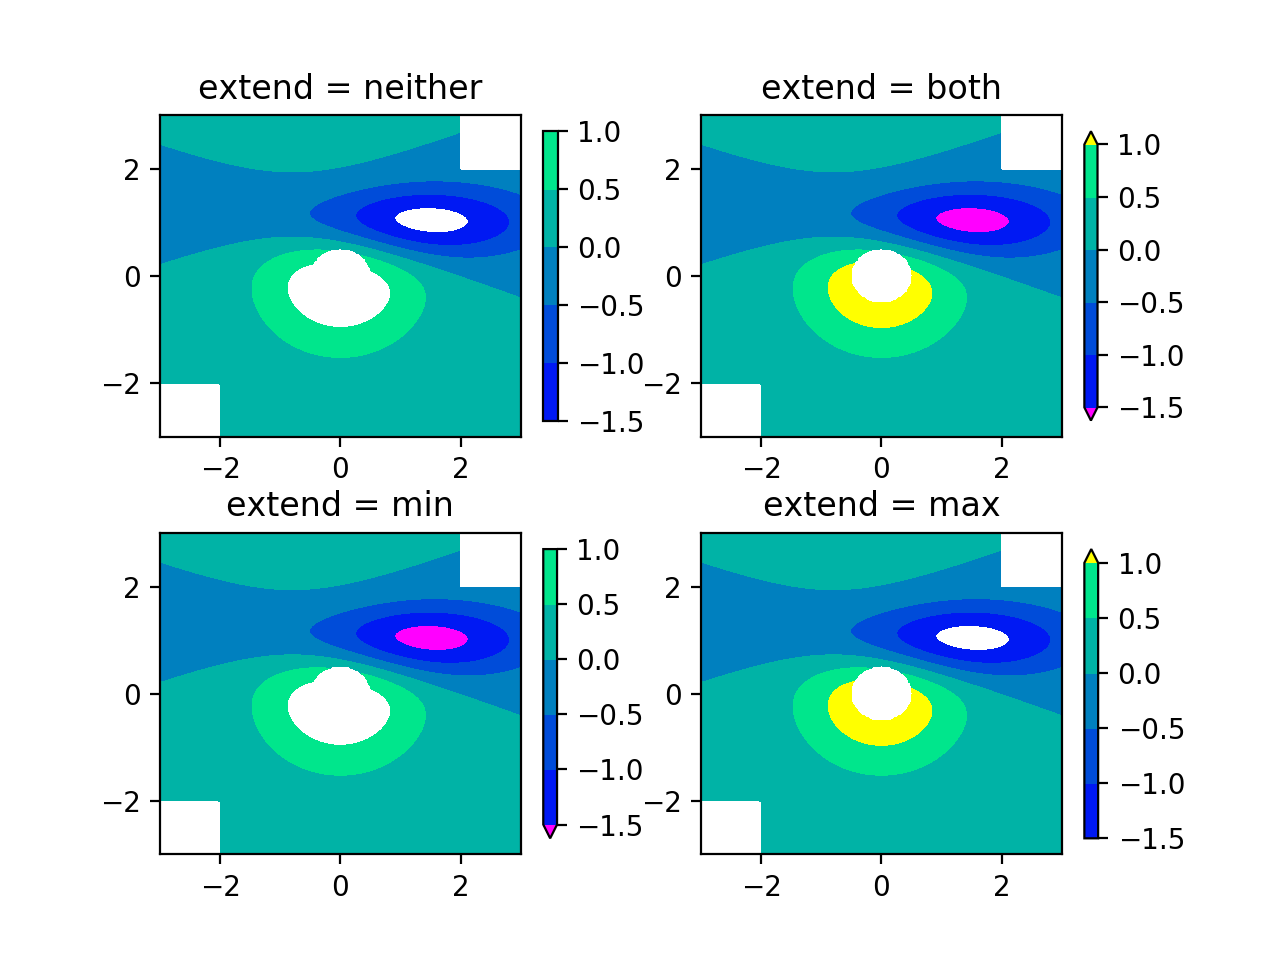

In [37]:
import numpy as np
import matplotlib.pyplot as plt

origin = 'lower'
#origin = 'upper'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr//6:, -nc//6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr//6, :nc//6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt((X**2) + (Y**2)) < 0.5
Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.

# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
cmap = plt.cm.get_cmap("winter")
cmap.set_under("magenta")
cmap.set_over("yellow")
# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.3)

for ax, extend in zip(axs.ravel(), extends):
    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
    fig.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title("extend = %s" % extend)
    ax.locator_params(nbins=4)

plt.show()

In [274]:
def show_images(location_list):
    plt.close('all')
    nrows = 1
    fig, ax = plt.subplots(nrows=nrows,ncols=3, figsize=(10*3,6.180), dpi=200)
    x = 1
    y = 2
    z = 3
    zmin = 0
    zmax=20
    xlabel="xlabel"
    ylabel="ylabel"
    title = ""
    titlefontsize = 28
    for image_idx, filename in enumerate(location_list):
        temp = re.findall(r"\d+", filename.split("/")[-1])[0]
        data = np.loadtxt(filename)
        data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
        data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
        data = data[~(data[:,z] < zmin)]

        xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
        yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
        zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
        # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
        jet = cm = plt.get_cmap('jet')
#         print(jet)
        # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
#         plt.figure()
        if nrows > 1:
            cs = ax[0,image_idx].contourf(xi, yi, zi, 30, cmap='jet')
            # plt.xlim(xmin, xmax)
            cs.set_clim(zmin, zmax)
    #         fig.clim()
            ax[0,image_idx].set_title("temp = %s" % temp)
        else:
            cs = ax[image_idx].contourf(xi, yi, zi, 30, cmap='jet')
            # plt.xlim(xmin, xmax)
            cs.set_clim(zmin, zmax)
    #         fig.clim()
            ax[image_idx].set_title("temp = %s" % temp)
    if nrows > 1:
        fig.colorbar(cs, ax=ax[0,2], shrink=1)
    else:
        fig.colorbar(cs, ax=ax[2], shrink=1)
#     fig.colorbar()

#         plt.xlabel(xlabel)
#         plt.ylabel(ylabel)
#         plt.title(title, y=1.02, fontsize = titlefontsize)


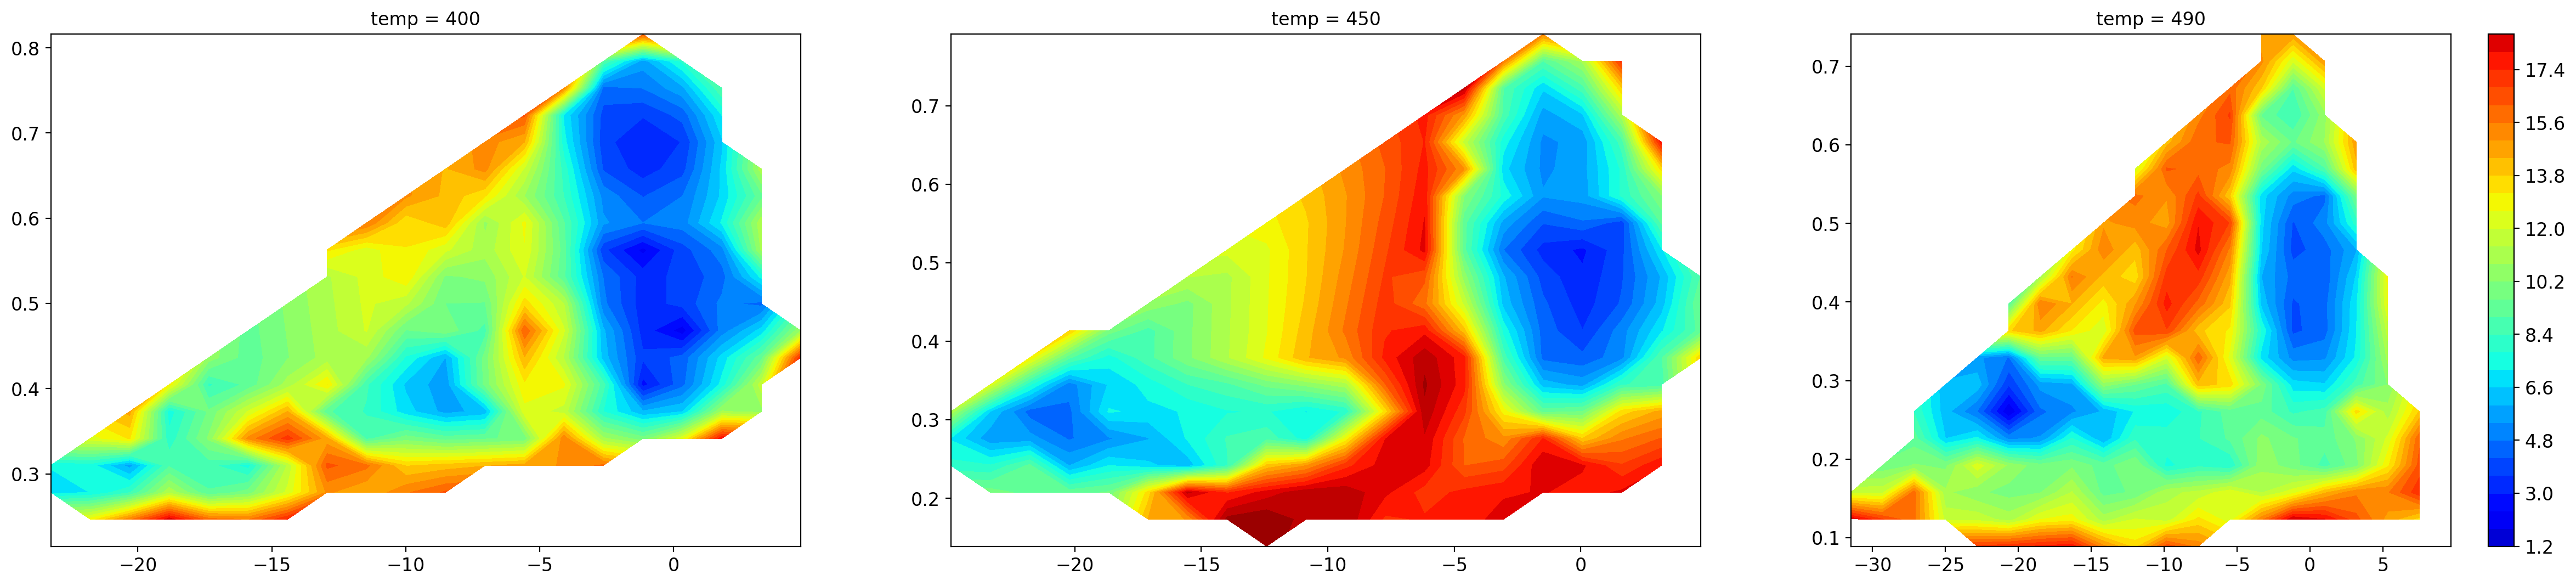

In [275]:
show_images(location_list)

In [161]:
location_list = []
temp_list = [400, 450, 490]
for temp in temp_list:
    location_list.append(location + "pmf-" + str(temp) +".dat")

In [143]:
def readPMF2d(pre):
    perturbation_table = {0:"original", 1:"p_mem",
                          2:"m_mem", 3:"p_lipid",
                          4:"m_lipid", 5:"p_go",
                          6:"m_go", 7:"p_rg", 8:"m_rg"}
    pmf_list = {
        "perturbation":list(perturbation_table.keys()),
        "force":["0.0", "0.1", "0.2"]
    }
    pmf_list_data = expand_grid(pmf_list)
    all_pmf_list = []
    for index, row in pmf_list_data.iterrows():
        force = row["force"]
        perturbation = row["perturbation"]
        if perturbation == 0:
            location = pre + f"/force_{force}/pmf-*.dat"
            pmf_list = glob.glob(location)
            change = "none"
            upOrDown = "none"
        else:
            location = pre + f"/force_{force}/perturbation-{perturbation}-pmf-*.dat"
            pmf_list = glob.glob(location)
            change = perturbation_table[perturbation].split("_")[-1]
            upOrDown = perturbation_table[perturbation].split("_")[0]
        # print(location)
        name_list = ["f", "df", "e", "s"]
        names = ["x", "y"] + name_list
        for location in pmf_list:
            # print(location)
            temp = re.findall(r'pmf-(\d+)', location)
            if len(temp) != 1:
                raise ValueError('Not expected to see more than one or none')
            else:
                temp = temp[0]
            data = pd.read_table(location, skiprows=2, sep='\s+', names=names).assign(upOrDown=upOrDown, change=change, force=force, temp=temp, perturbation=perturbation_table[perturbation])
            all_pmf_list.append(data)

    return pd.concat(all_pmf_list).dropna().reset_index()

In [318]:
def show_images(all_data):
    plt.close('all')
    nrows = 1
    fig, ax = plt.subplots(nrows=nrows,ncols=3, figsize=(10*3,6.180), dpi=200)
    x = 1
    y = 2
    z = 3
    zmin = 0
    zmax=20
    xlabel="xlabel"
    ylabel="ylabel"
    title = ""
    titlefontsize = 28
    test = all_data.query("mode == '2d_z_qw'").query("temp == '450'").query("force == 0.0")
    origin = test.query("perturbation == 'original'")
    one_change_data = test.query("change == 'rg'")
    up = one_change_data.query("upOrDown == 'p'")
    down = one_change_data.query("upOrDown == 'm'")
    plot_data = [down, origin, up]
    dic_upOrDown = {0:"down", 1:"origin", 2:"up"}
    for image_idx, pddata in enumerate(plot_data):
        data = pddata[["index", "x","y","f"]].values
#         print(data)
        data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
        data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
        data = data[~(data[:,z] < zmin)]

        xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
        yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
        zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
        # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
        jet = cm = plt.get_cmap('jet')
#         print(jet)
        # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
#         plt.figure()
        if nrows > 1:
            cs = ax[0,image_idx].contourf(xi, yi, zi, 30, cmap='jet')
            # plt.xlim(xmin, xmax)
            cs.set_clim(zmin, zmax)
    #         fig.clim()
            ax[0,image_idx].set_title(f"rg: {dic_upOrDown[image_idx]}")
        else:
            cs = ax[image_idx].contourf(xi, yi, zi, 30, cmap='jet')
            # plt.xlim(xmin, xmax)
            cs.set_clim(zmin, zmax)
    #         fig.clim()
            ax[image_idx].set_title(f"rg: {dic_upOrDown[image_idx]}")
    if nrows > 1:
        fig.colorbar(cs, ax=ax[0,2], shrink=1)
    else:
        fig.colorbar(cs, ax=ax[2], shrink=1)
#     fig.colorbar()

#         plt.xlabel(xlabel)
#         plt.ylabel(ylabel)
#         plt.title(title, y=1.02, fontsize = titlefontsize)



In [317]:
all_data

level_0  index       x      y       f   df         e         s change  \
0             0     39   4.669  0.315  10.371  0.0  -354.601  -364.971   none   
1             1     64   8.823  0.190   4.514  0.0  -290.968  -295.482   none   
2             2     65   8.823  0.215   0.829  0.0  -250.503  -251.332   none   
3             3     66   8.823  0.240  10.747  0.0  -352.302  -363.048   none   
4             4     90  12.977  0.089   6.465  0.0  -288.397  -294.862   none   
5             5     93  12.977  0.165   6.081  0.0  -295.410  -301.491   none   
6             6     94  12.977  0.190   3.728  0.0  -277.084  -280.811   none   
7             7     95  12.977  0.215   9.888  0.0  -326.312  -336.199   none   
8             8     96  12.977  0.240   3.842  0.0  -271.820  -275.661   none   
9             9     97  12.977  0.265  17.391  0.0  -394.717  -412.108   none   
10           10    100  12.977  0.340  24.341  0.0  -437.941  -462.282   none   
11           11    101  12.977  0.365  29.847  0.0  -540.210  -570.057   none   
12           12    103  12.977  0.415  31.883  0.0 -1223.147 -1255.030   none   
13           13    121  17.131  0.114   9.062  0.0  -305.615  -314.677   none   
14           14    122  17.131  0.139   5.422  0.0  -268.570  -273.992   none   
15           15    123  17.131  0.165  11.347  0.0  -326.930  -338.277   none   
16           16    124  17.131  0.190   2.075  0.0  -244.473  -246.547   none   
17           17    125  17.131  0.215   3.369  0.0  -251.933  -255.302   none   
18           18    126  17.131  0.240   7.146  0.0  -296.330  -303.476   none   
19           19    127  17.131  0.265  25.350  0.0  -439.744  -465.094   none   
20           20    128  17.131  0.290  10.023  0.0  -313.731  -323.754   none   
21           21    129  17.131  0.315  17.173  0.0  -386.627  -403.800   none   
22           22    130  17.131  0.340  20.907  0.0  -407.194  -428.101   none   
23           23    151  21.285  0.114   2.449  0.0  -238.937  -241.385   none   
24           24    152  21.285  0.139  10.059  0.0  -315.383  -325.441   none   
25           25    153  21.285  0.165   5.730  0.0  -261.850  -267.580   none   
26           26    154  21.285  0.190  10.028  0.0  -314.911  -324.939   none   
27           27    155  21.285  0.215   7.692  0.0  -284.728  -292.420   none   
28           28    156  21.285  0.240   7.212  0.0  -281.995  -289.207   none   
29           29    157  21.285  0.265   9.882  0.0  -311.669  -321.550   none   
...         ...    ...     ...    ...     ...  ...       ...       ...    ...   
987651   253336    665   3.099  0.215  21.990  0.0  -682.317  -704.307     rg   
987652   253337    666   3.099  0.240  26.326  0.0  -669.578  -695.905     rg   
987653   253338    667   3.099  0.265  24.922  0.0  -669.292  -694.214     rg   
987654   253339    668   3.099  0.290  24.491  0.0  -678.662  -703.153     rg   
987655   253340    669   3.099  0.315  16.613  0.0  -735.756  -752.369     rg   
987656   253341    670   3.099  0.340   8.581  0.0  -830.605  -839.186     rg   
987657   253342    671   3.099  0.365   7.651  0.0  -892.384  -900.035     rg   
987658   253343    672   3.099  0.390   6.736  0.0  -876.205  -882.941     rg   
987659   253344    673   3.099  0.415   5.638  0.0  -883.488  -889.126     rg   
987660   253345    674   3.099  0.440   4.305  0.0  -890.633  -894.938     rg   
987661   253346    675   3.099  0.465   3.820  0.0  -894.141  -897.961     rg   
987662   253347    676   3.099  0.490   4.100  0.0  -903.127  -907.227     rg   
987663   253348    677   3.099  0.515   4.162  0.0  -910.164  -914.326     rg   
987664   253349    678   3.099  0.541   5.722  0.0  -909.762  -915.484     rg   
987665   253350    679   3.099  0.566   6.237  0.0  -900.539  -906.776     rg   
987666   253351    680   3.099  0.591   8.599  0.0  -855.581  -864.180     rg   
987667   253352    681   3.099  0.616   7.706  0.0  -918.718  -926.424     rg   
987668   253353    682   3.099  0.641  

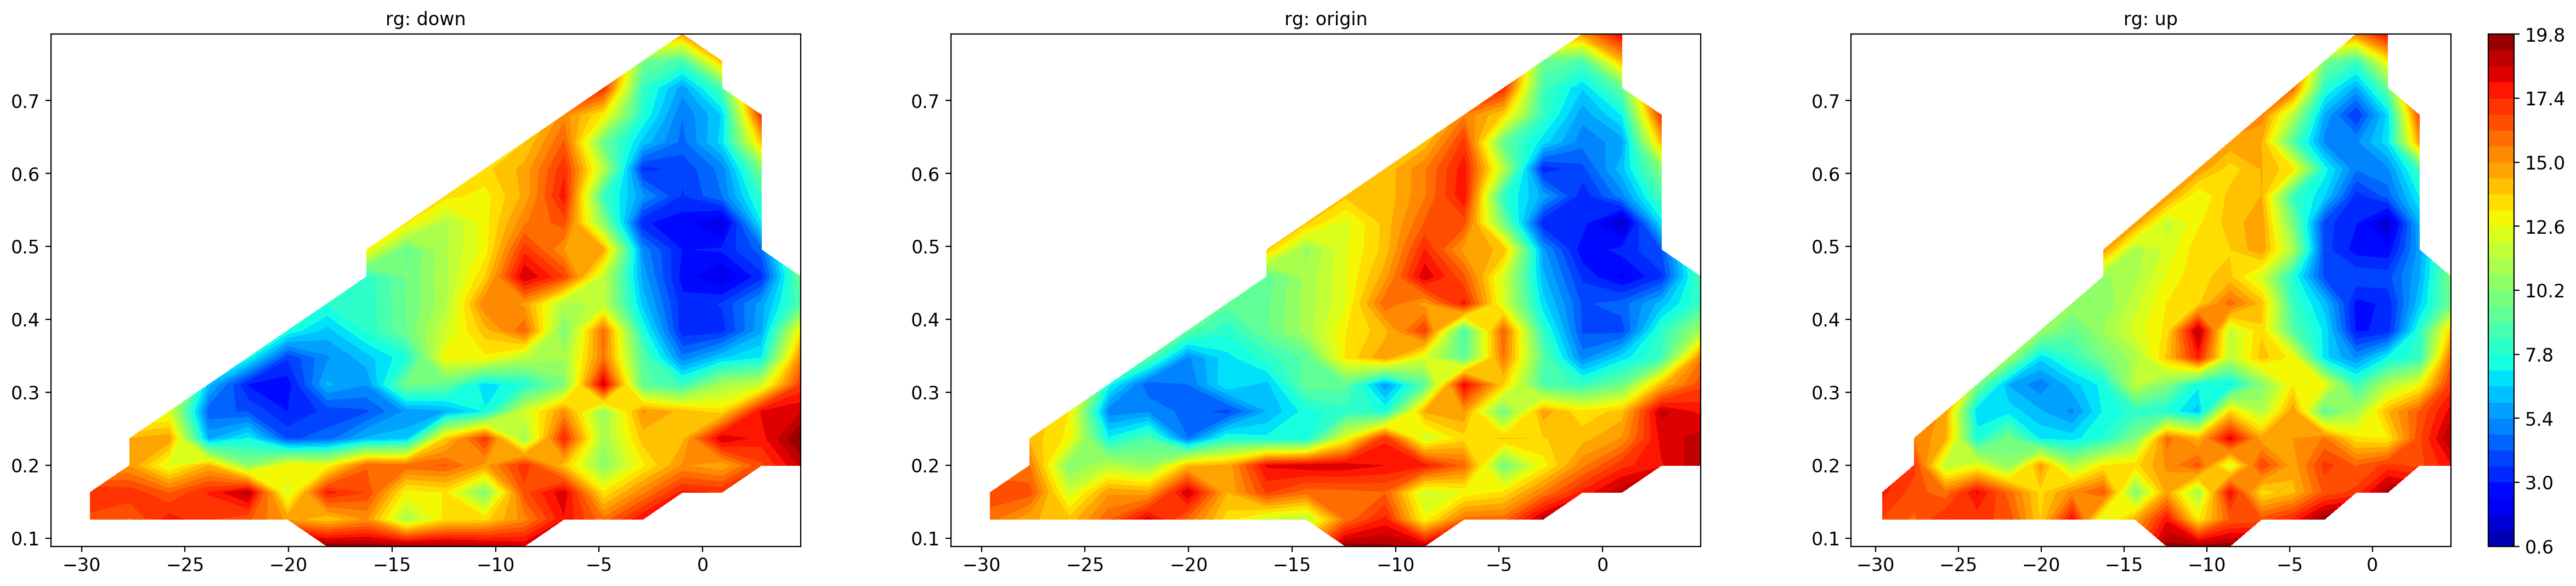

In [251]:
show_images(all_data)

In [323]:
all_data.query("mode == '2d_z_qw'").query("temp == '450'").query("force=='0.0'")

level_0  index       x      y       f   df         e         s change  \
736441     2126     32 -31.482  0.139  28.506  0.0  -636.139  -664.646   none   
736442     2127     33 -31.482  0.165  25.347  0.0  -586.616  -611.963   none   
736443     2128     63 -29.836  0.165  29.547  0.0  -582.855  -612.402   none   
736444     2129     91 -28.189  0.114  27.610  0.0  -650.663  -678.273   none   
736445     2130     92 -28.189  0.139  24.981  0.0  -606.200  -631.181   none   
736446     2131     94 -28.189  0.190  20.194  0.0  -650.647  -670.841   none   
736447     2132    122 -26.542  0.139  32.859  0.0 -1226.614 -1259.473   none   
736448     2133    123 -26.542  0.165  29.509  0.0  -667.106  -696.615   none   
736449     2134    124 -26.542  0.190  25.934  0.0  -585.286  -611.220   none   
736450     2135    151 -24.895  0.114  29.446  0.0  -574.440  -603.886   none   
736451     2136    152 -24.895  0.139  26.547  0.0  -655.329  -681.876   none   
736452     2137    154 -24.895  0.190  27.313  0.0  -569.705  -597.018   none   
736453     2138    155 -24.895  0.215   8.989  0.0  -744.239  -753.228   none   
736454     2139    157 -24.895  0.265   7.134  0.0  -761.029  -768.164   none   
736455     2140    158 -24.895  0.290   7.158  0.0  -746.116  -753.274   none   
736456     2141    159 -24.895  0.315  12.134  0.0  -715.884  -728.018   none   
736457     2142    181 -23.249  0.114  29.768  0.0  -589.146  -618.914   none   
736458     2143    182 -23.249  0.139  22.661  0.0  -642.207  -664.867   none   
736459     2144    183 -23.249  0.165  25.735  0.0  -590.551  -616.287   none   
736460     2145    184 -23.249  0.190  31.128  0.0  -626.764  -657.892   none   
736461     2146    185 -23.249  0.215  23.970  0.0  -592.208  -616.179   none   
736462     2147    186 -23.249  0.240   7.945  0.0  -744.680  -752.625   none   
736463     2148    187 -23.249  0.265   5.973  0.0  -789.643  -795.616   none   
736464     2149    188 -23.249  0.290   4.873  0.0  -879.840  -884.713   none   
736465     2150    189 -23.249  0.315   6.806  0.0  -858.198  -865.004   none   
736466     2151    211 -21.602  0.114  27.240  0.0  -578.359  -605.600   none   
736467     2152    212 -21.602  0.139  21.299  0.0  -639.506  -660.805   none   
736468     2153    213 -21.602  0.165  26.542  0.0  -577.221  -603.763   none   
736469     2154    214 -21.602  0.190  33.195  0.0 -1345.187 -1378.382   none   
736470     2155    215 -21.602  0.215   7.919  0.0  -769.967  -777.886   none   
...         ...    ...     ...    ...     ...  ...       ...       ...    ...   
960324   226009    686   3.099  0.741  31.700  0.0  1063.065  1031.366     rg   
960325   226010    687   3.099  0.766  31.700  0.0  1077.934  1046.234     rg   
960326   226011    692   4.746  0.139  31.700  0.0   434.890   403.191     rg   
960327   226012    693   4.746  0.165  30.745  0.0  -125.932  -156.678     rg   
960328   226013    694   4.746  0.190  22.027  0.0  -628.224  -650.251     rg   
960329   226014    695   4.746  0.215  25.775  0.0  -597.881  -623.656     rg   
960330   226015    696   4.746  0.240  23.763  0.0  -610.970  -634.733     rg   
960331   226016    697   4.746  0.265  31.700  0.0   442.324   410.625     rg   
960332   226017    698   4.746  0.290  31.700  0.0   457.192   425.493     rg   
960333   226018    701   4.746  0.365  14.633  0.0  -679.518  -694.152     rg   
960334   226019    702   4.746  0.390  12.652  0.0  -783.862  -796.514     rg   
960335   226020    703   4.746  0.415   8.718  0.0  -762.473  -771.190     rg   
960336   226021    704   4.746  0.440   9.509  0.0  -802.052  -811.561     rg   
960337   226022    705   4.746  0.465   9.753  0.0  -813.900  -823.653     rg   
960338   226023    706   4.746  0.490   8.685  0.0  -808.879  -817.564     rg   
960339   226024    721   6.392  0.114  31.700  0.0   460.909   429.210     rg   
960340   226025    722   6.392  0.139  31.687  0.0   521.049   489.362     rg   
960341   226026    723   6.392  0.165  

In [328]:
def show_images_all(all_data, temp=450):
    plt.close('all')
    nrows = 4
    fig, ax = plt.subplots(nrows=nrows,ncols=3, figsize=(10*3,6.180*nrows), dpi=200)
    x = 1
    y = 2
    z = 3
    zmin = 0
    zmax=20
    xlabel="xlabel"
    ylabel="ylabel"
    title = ""
    titlefontsize = 28
    test = all_data.query("mode == '2d_z_qw'").query(f"temp == '{temp}'").query("force == '0.0'")
    origin = test.query("perturbation == 'original'")
    one_change_data = test.query("change == 'rg'")
    up = one_change_data.query("upOrDown == 'p'")
    down = one_change_data.query("upOrDown == 'm'")
    plot_data = [down, origin, up]
    dic_upOrDown = {0:"down", 1:"origin", 2:"up"}
    test = test.query("change != 'none'")
    for idx, (change, one_change_data) in enumerate(test.groupby("change")):
        up = one_change_data.query("upOrDown == 'p'")
        down = one_change_data.query("upOrDown == 'm'")
        plot_data = [down, origin, up]
        for image_idx, pddata in enumerate(plot_data):
            data = pddata[["index", "x","y","f"]].values
    #         print(data)
            data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
            data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
            data = data[~(data[:,z] < zmin)]

            xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
            yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
            zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
            # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
            jet = cm = plt.get_cmap('jet')
    #         print(jet)
            # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
    #         plt.figure()
            cs = ax[idx,image_idx].contourf(xi, yi, zi, 30, cmap='jet')
            # plt.xlim(xmin, xmax)
            cs.set_clim(zmin, zmax)
    #         fig.clim()
            ax[idx,image_idx].set_title(f"{change}: {dic_upOrDown[image_idx]}", fontsize = titlefontsize)
        fig.colorbar(cs, ax=ax[idx,2], shrink=1)
#     fig.colorbar()
    fig.suptitle(f'temp = {temp}', y=1.02, fontsize = titlefontsize*1.5)
#     fig.subplots_adjust(top=1.02)
    fig.tight_layout()
#         plt.xlabel(xlabel)
#         plt.ylabel(ylabel)
#         plt.title(title, y=1.02, fontsize = titlefontsize)




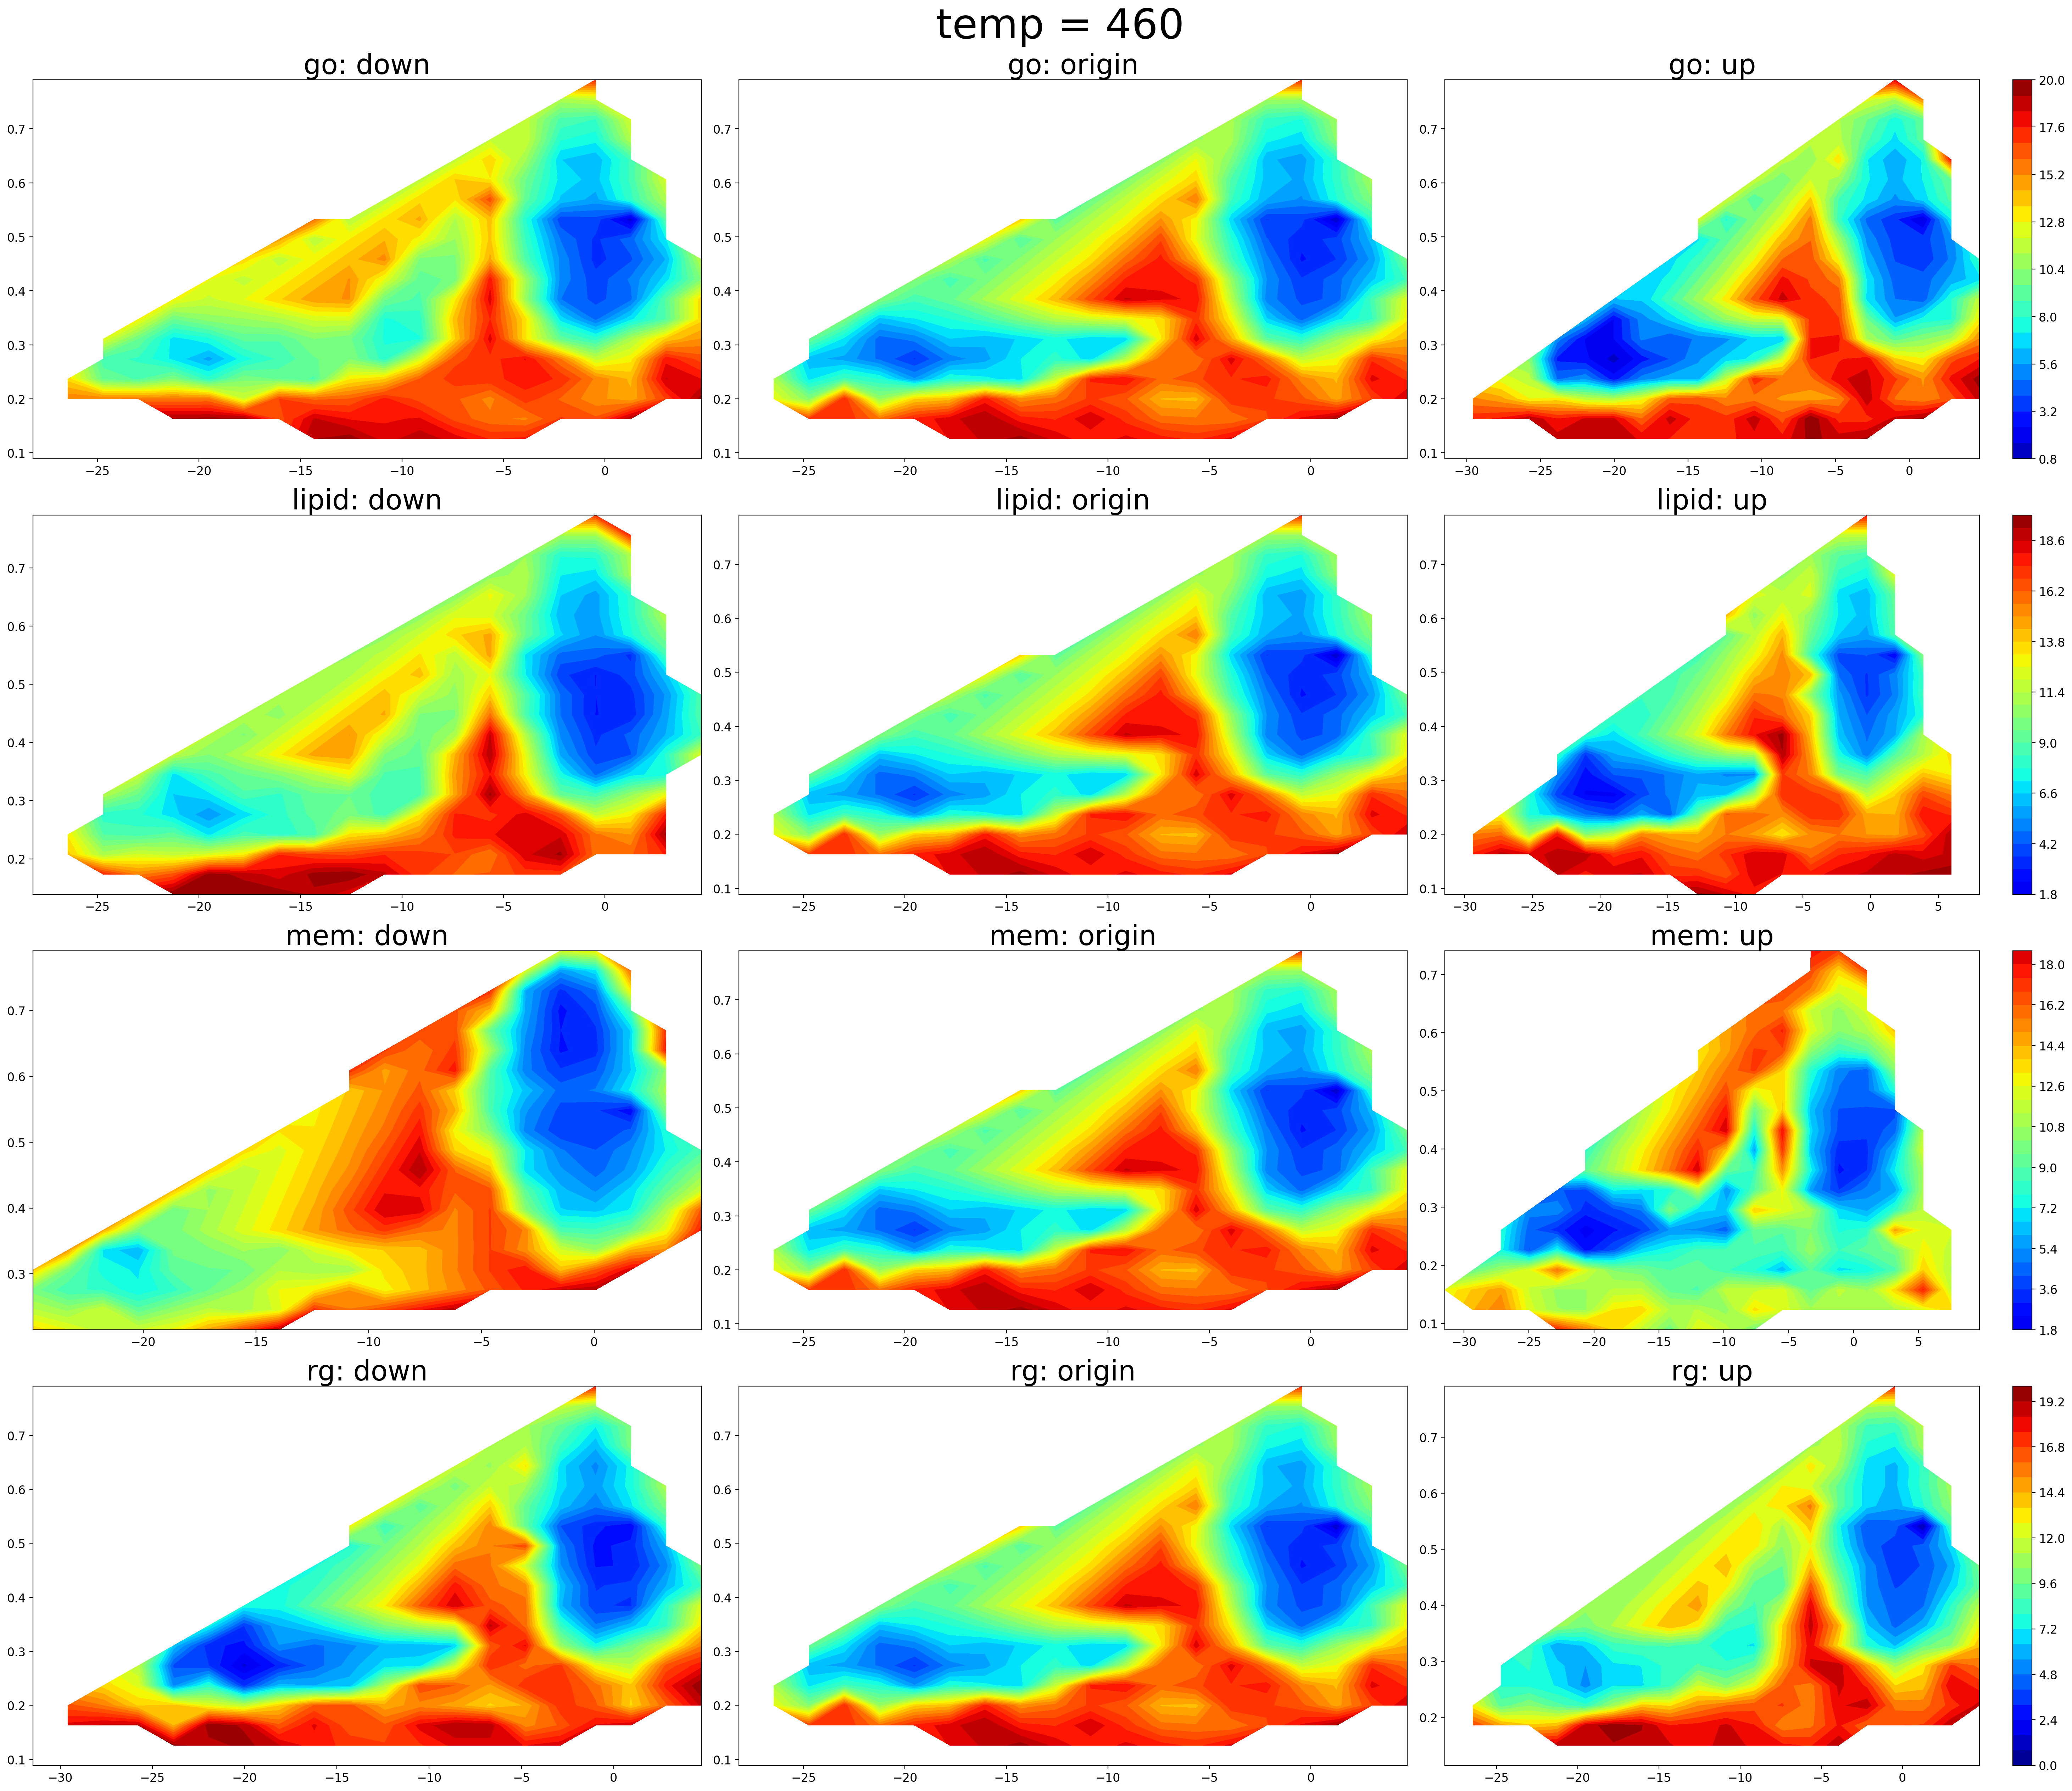

In [329]:
show_images_all(all_data, 460)

In [326]:
def show_images_all_diff(all_data):
    plt.close('all')
    nrows = 4
    fig, ax = plt.subplots(nrows=nrows,ncols=3, figsize=(10*3,6.180*nrows), dpi=200)
    x = 1
    y = 2
    z = 3
    zmin = 0
    zmax=20
    xlabel="xlabel"
    ylabel="ylabel"
    title = ""
    titlefontsize = 28
    test = all_data.query("mode == '2d_z_qw'").query("temp == '450'").query("force == '0.0'")
    origin = test.query("perturbation == 'original'")
    origin = origin[["index", "x","y","f"]].values
    
    data = origin
    data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
    data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
    data = data[~(data[:,z] < zmin)]

    xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
    yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
    origin_zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
    
    dic_upOrDown = {0:"down", 1:"origin", 2:"up"}
    test = test.query("change != 'none'")
    for idx, (change, one_change_data) in enumerate(test.groupby("change")):
        up = one_change_data.query("upOrDown == 'p'")
        up = up[["index", "x","y","f"]].values
        down = one_change_data.query("upOrDown == 'm'")
        down = down[["index", "x","y","f"]].values
        numpy_list = [down, origin, up]

        for image_idx, pddata in enumerate(numpy_list):
            data = pddata
    #         print(data)
            data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
            data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
            data = data[~(data[:,z] < zmin)]

            xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
            yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
            zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
            if image_idx !=1:
                zi -= origin_zi
            # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
            jet = cm = plt.get_cmap('jet')
    #         print(jet)
            # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
    #         plt.figure()
            cs = ax[idx,image_idx].contourf(xi, yi, zi, 30, cmap='jet')
            # plt.xlim(xmin, xmax)
            cs.set_clim(zmin, zmax)
    #         fig.clim()
            ax[idx,image_idx].set_title(f"{change}: {dic_upOrDown[image_idx]}", fontsize = titlefontsize)
        fig.colorbar(cs, ax=ax[idx,2], shrink=1)
#     fig.colorbar()
    fig.suptitle(f'temp = 450', y=1.02, fontsize = titlefontsize*1.5)
#     fig.subplots_adjust(top=1.02)
    fig.tight_layout()
#         plt.xlabel(xlabel)
#         plt.ylabel(ylabel)
#         plt.title(title, y=1.02, fontsize = titlefontsize)





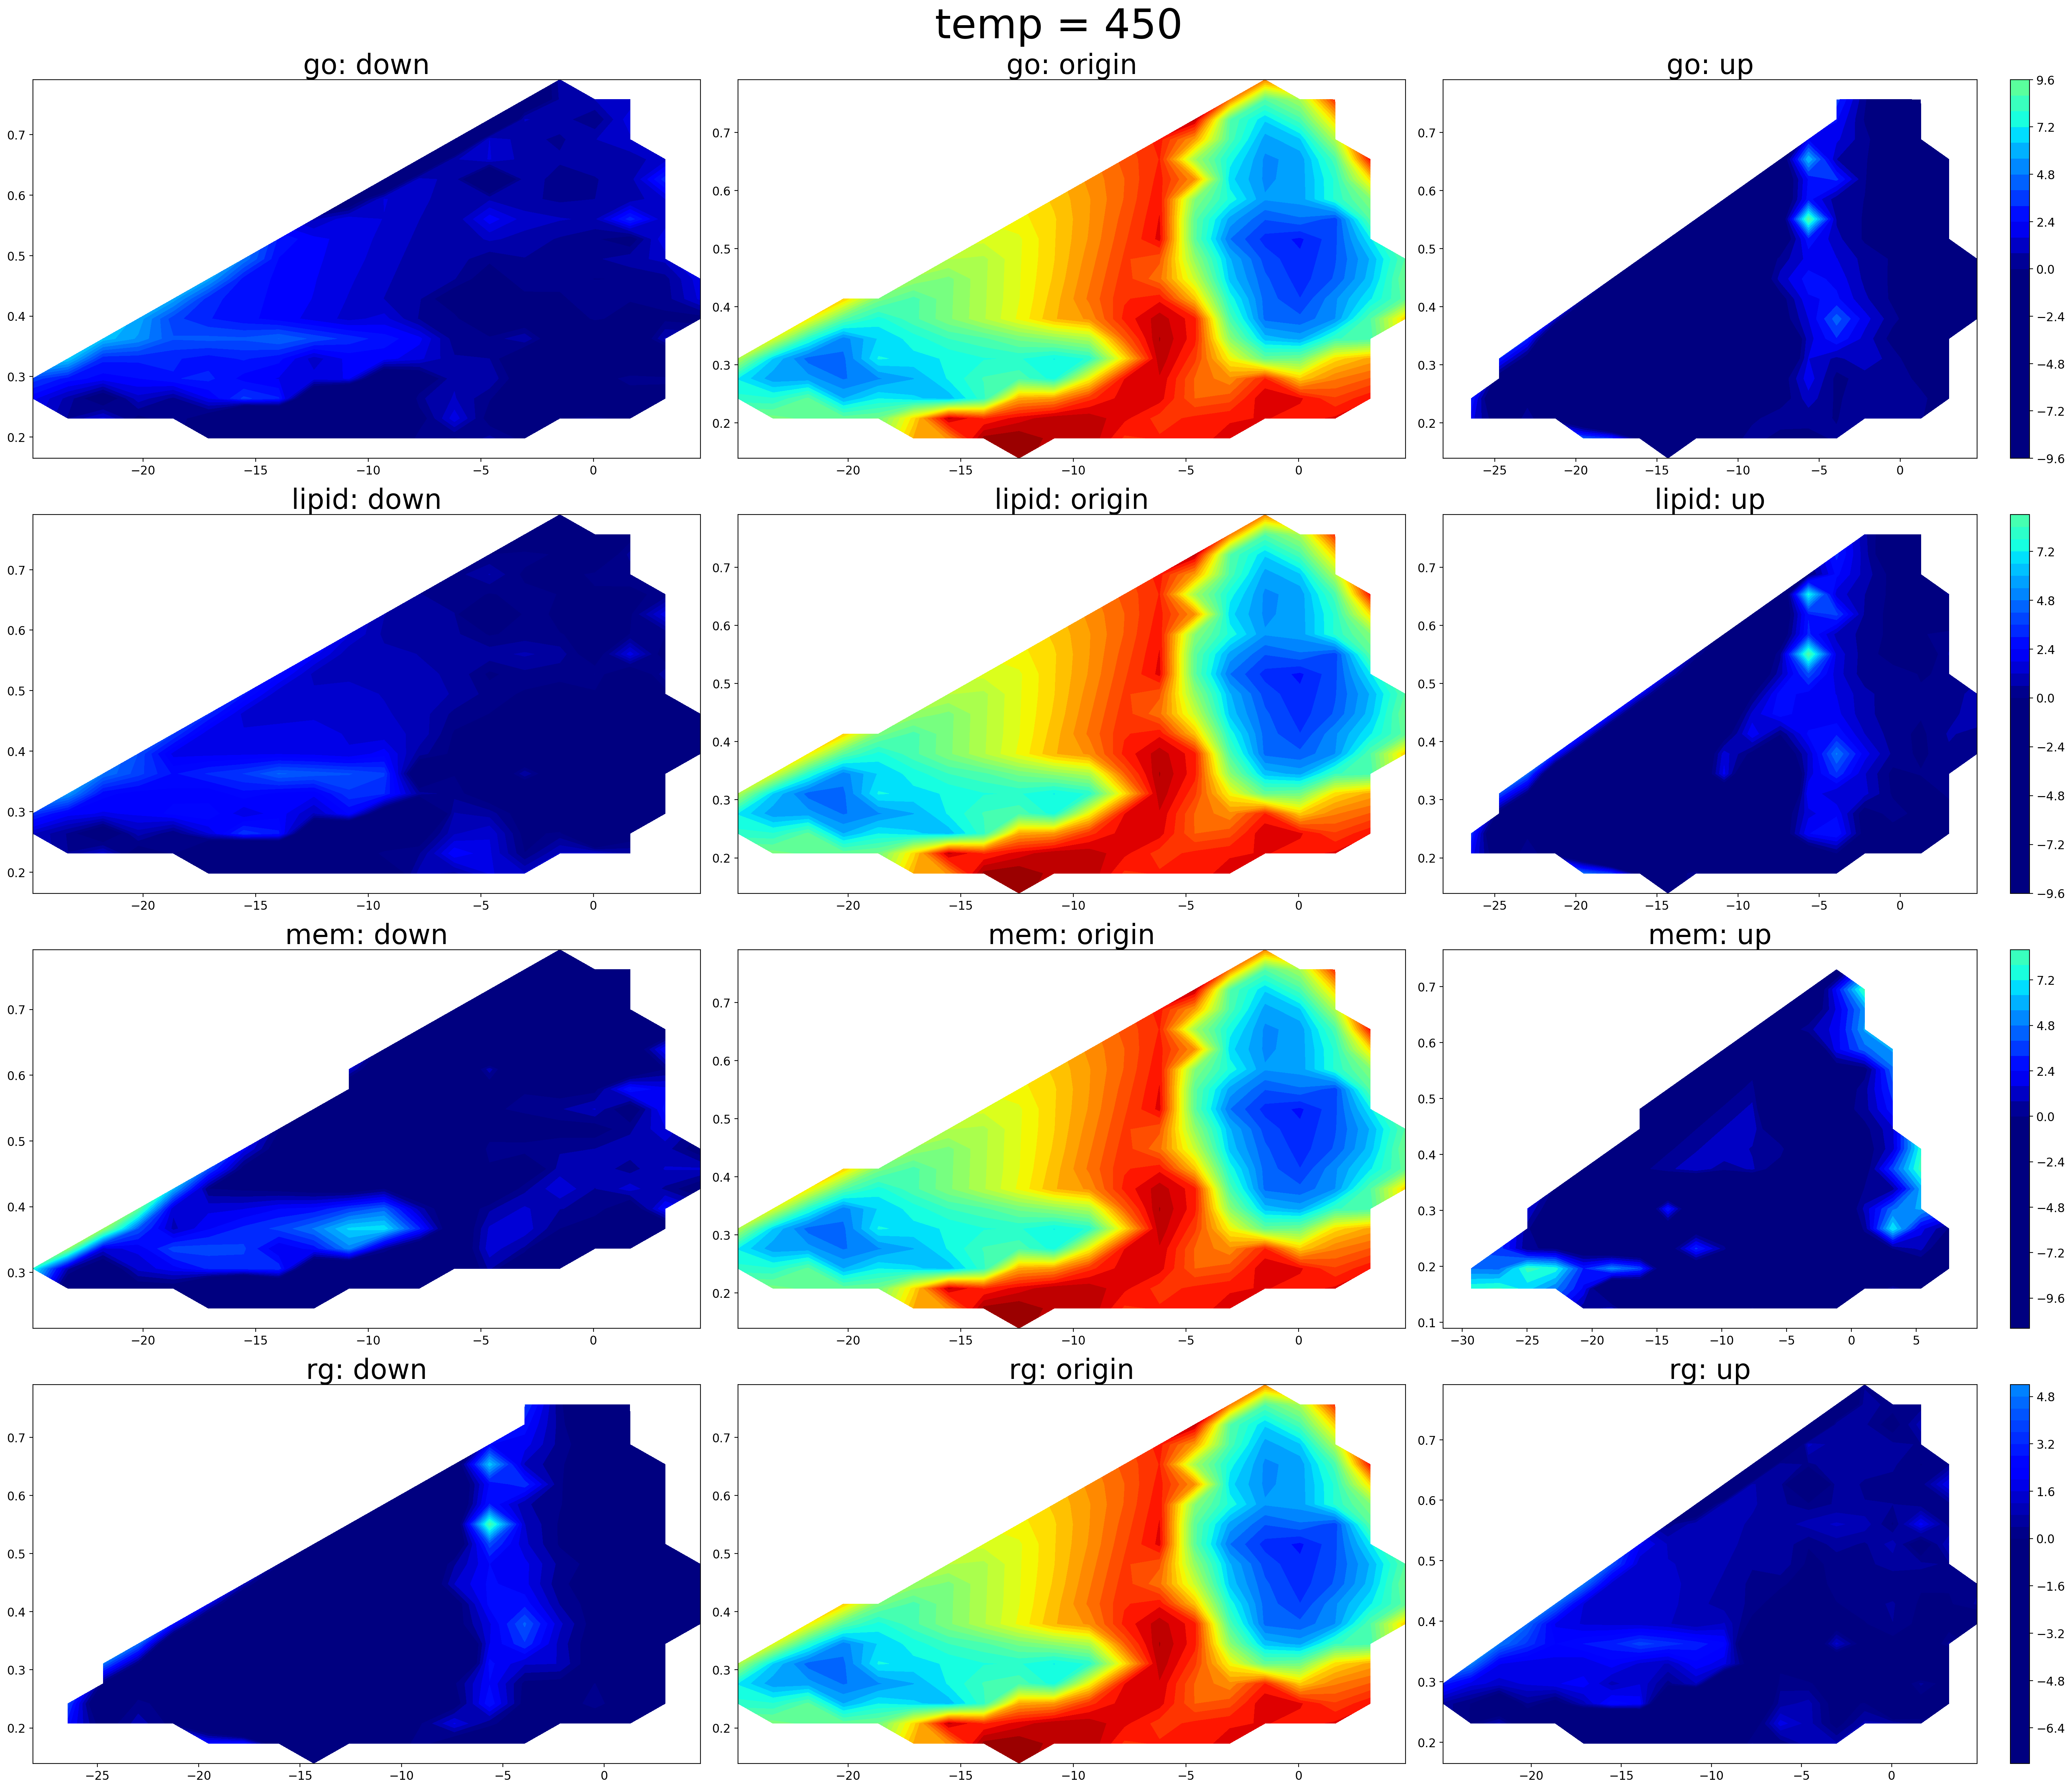

In [327]:
show_images_all(all_data)

In [212]:
def plot2d_one(data, temp="450", zmax=20, xlabel="xlabel", ylabel="ylabel", title = ""):
    x = 1
    y = 2
    z = 3
    zmin = 0
    titlefontsize = 28
    data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
    data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
    data = data[~(data[:,z] < zmin)]

    xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
    yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
    zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
    # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
    jet = cm = plt.get_cmap('jet')
    print(jet)
    # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
    plt.figure()
    plt.contourf(xi, yi, zi, 30, cmap='jet')
    # plt.xlim(xmin, xmax)
    plt.clim(zmin, zmax)
    plt.colorbar()

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, y=1.02, fontsize = titlefontsize)
    #plt.tight_layout()
    #plt.axis('equal')
    #plt.axes().set_aspect('equal')
    #plt.axes().set_aspect('scaled')
    # plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
    plt.show()

In [200]:
all_data = pd.read_feather("/Users/weilu/Research/data/pulling/16_Feb_data_1.feather")

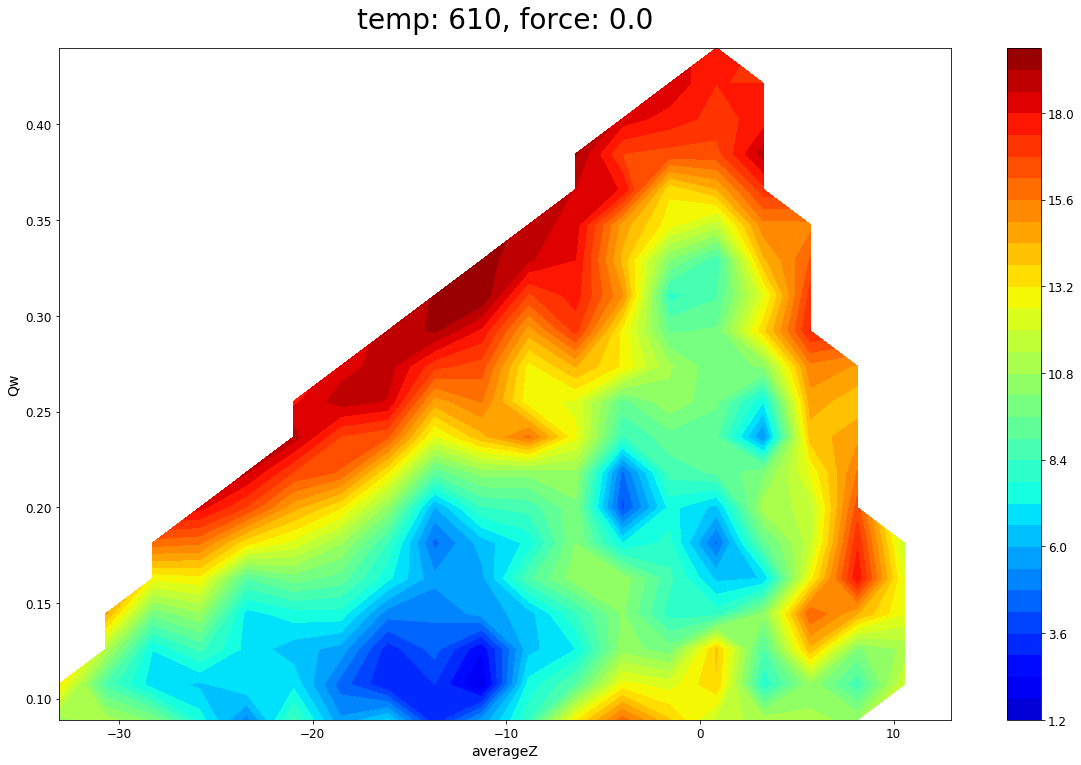

In [211]:
pre = "/Users/weilu/Research/server/feb_2018"
folder = pre + "/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 610
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

In [293]:
test = all_data.query("mode == '2d_z_qw'").query("temp == '610'")
origin = test.query("perturbation == 'original'")
data = origin[["index", "x","y","f"]].values

In [296]:
data-data*0.5

array([[  0.00000000e+00,  -1.65645000e+01,   4.45000000e-02,
          5.31900000e+00],
       [  5.00000000e-01,  -1.65645000e+01,   5.70000000e-02,
          7.11000000e+00],
       [  1.50000000e+01,  -1.57410000e+01,   4.45000000e-02,
          5.02550000e+00],
       ..., 
       [  4.06000000e+02,   5.66600000e+00,   6.95000000e-02,
          9.53850000e+00],
       [  4.06500000e+02,   5.66600000e+00,   8.25000000e-02,
          8.90100000e+00],
       [  4.20500000e+02,   6.48950000e+00,   5.70000000e-02,
          1.00400000e+01]])

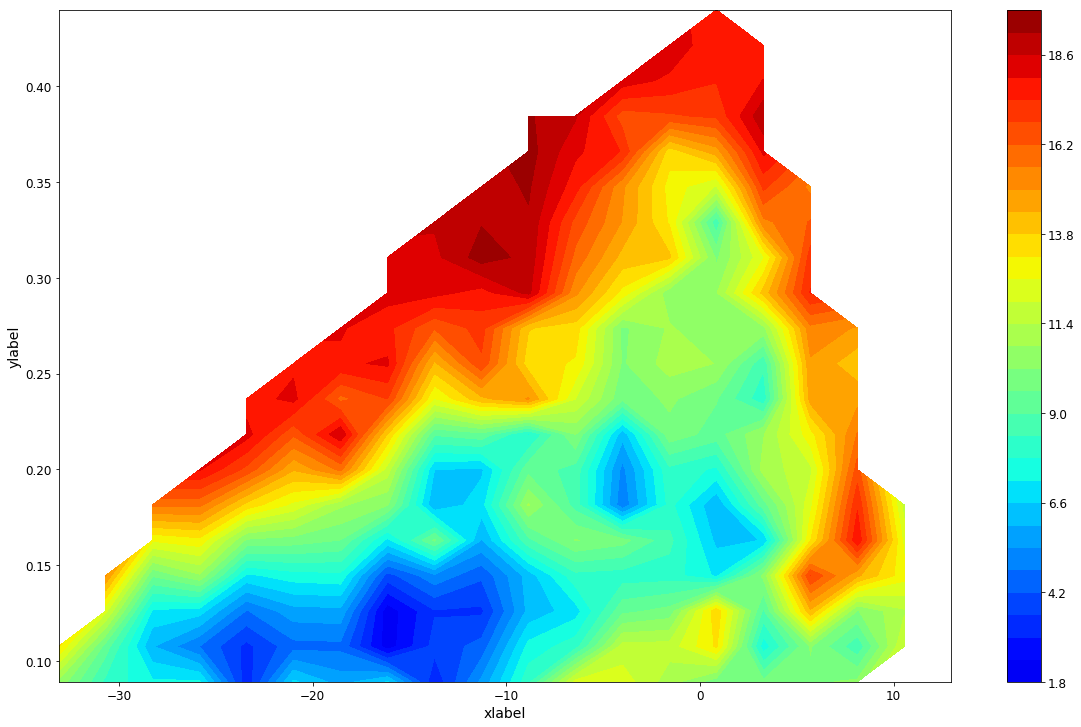

In [229]:
plot2d_one(data)

In [ ]:
dic_change = 

In [252]:
test = all_data.query("mode == '2d_z_qw'").query("temp == '450'")
origin = test.query("perturbation == 'original'")
for change, data in test.groupby("change"):
    print(change)

go
lipid
mem
none
rg


In [256]:
test = all_data.query("mode == '2d_z_qw'").query("temp == '450'")
origin = test.query("perturbation == 'original'")
for idx, (change, data) in enumerate(test.groupby("change")):
    print(idx, change)

0 go
1 lipid
2 mem
3 none
4 rg


In [206]:
data = origin[["index", "x","y","f"]].values

In [208]:
z = 3
zmax = 30
zmin =10

In [209]:

data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

In [330]:
test = pd.read_feather("/Users/weilu/Research/server/feb_2018/week_of_feb12/all_data_folder/rg_0.1_lipid_1.0_mem_1.feather")

In [334]:
test.tail()

Step  Run Temp        Qw      Energy   AverageZ   Distance  \
4319995  40000000    0   T1  0.712216 -876.185849  -0.764133  28.734831   
4319996  40000000    6   T8  0.094733  252.115450 -10.497280  20.245972   
4319997  40000000    8   T4  0.330887 -458.787451   0.220878  34.858974   
4319998  40000000    2   T5  0.328430 -342.594112   0.731078  13.225533   
4319999  40000000   11  T11  0.090756  867.016880 -15.523166  34.516400   

             Lipid    Lipid1        Lipid2   ...           Rg       rg1  \
4319995 -23.260379 -3.472237 -8.600992e-01   ...     6.954870  1.079367   
4319996   1.377492  1.049151 -5.217408e-07   ...     5.231158  1.551201   
4319997 -25.500460 -2.352977  5.080465e-01   ...     7.237399  0.920377   
4319998 -21.983540  1.562753  1.323853e+00   ...     5.127996  0.671103   
4319999   1.900351  0.863600  1.618946e-04   ...    10.432051  3.769167   

              rg2       rg3       rg4       rg5       rg6     rg_all  \
4319995  1.279099  1.073422  1.290880  1.111468  1.120634   6.954870   
4319996  1.276413  0.000201  0.000032  2.157271  0.246040   5.231158   
4319997  1.342275  0.815695  0.896099  1.387977  1.874975   7.237399   
4319998  0.914478  0.870749  0.583107  0.850158  1.238402   5.127996   
4319999  2.667069  0.000020  0.477569  2.171118  1.347108  10.432051   

             TotalE  BiasTo  
4319995 -899.446229    32.0  
4319996  253.492942    32.0  
4319997 -484.287912    32.0  
4319998 -364.577652    32.0  
4319999  868.917231    32.0  

[5 rows x 35 columns]

In [335]:
test.iloc[4319995]

Step        40000000
Run                0
Temp              T1
Qw          0.712216
Energy      -876.186
AverageZ   -0.764133
Distance     28.7348
Lipid       -23.2604
Lipid1      -3.47224
Lipid2     -0.860099
Lipid3      0.896891
Lipid4       1.50743
Lipid5       1.56462
Lipid6      -1.51379
Lipid7      -3.85152
Lipid8      -2.80935
Lipid9     -0.623215
Lipid10     -2.45654
Lipid11       1.0032
Lipid12     -4.37037
Lipid13      -3.3096
Lipid14     -4.11646
Lipid15    -0.849318
AMH-Go      -613.433
Membrane     -26.818
Rg           6.95487
rg1          1.07937
rg2           1.2791
rg3          1.07342
rg4          1.29088
rg5          1.11147
rg6          1.12063
rg_all       6.95487
TotalE      -899.446
BiasTo          32.0
Name: 4319995, dtype: object

In [ ]:
data.groupby("")

In [336]:
chosen_list = ["TotalE", "Qw", "Distance"]
chosen = test[chosen_list]

In [340]:
tmp = test
kmem=0.2
klipid=0.1
kgo=0.1
krg=0.2

In [341]:
chosen = chosen.assign(TotalE_perturb_mem_p=tmp.TotalE + kmem*tmp.Membrane,
                                    TotalE_perturb_mem_m=tmp.TotalE - kmem*tmp.Membrane,
                                    TotalE_perturb_lipid_p=tmp.TotalE + klipid*tmp.Lipid,
                                    TotalE_perturb_lipid_m=tmp.TotalE - klipid*tmp.Lipid,
                                    TotalE_perturb_go_p=tmp.TotalE + kgo*tmp["AMH-Go"],
                                    TotalE_perturb_go_m=tmp.TotalE - kgo*tmp["AMH-Go"],
                                    TotalE_perturb_rg_p=tmp.TotalE + krg*tmp.Rg,
                                    TotalE_perturb_rg_m=tmp.TotalE - krg*tmp.Rg)

In [342]:
chosen

TotalE        Qw    Distance  TotalE_perturb_go_m  \
0       -219.339513  0.055990  260.982967          -185.524290   
1       -107.253993  0.054173  258.073699           -76.087367   
2        416.080199  0.044032  254.273113           440.825695   
3       -205.353631  0.053589  255.848653          -172.753568   
4         35.390706  0.053863  256.916161            66.336627   
5        307.907932  0.045892  261.351069           335.926416   
6        189.146948  0.045411  255.397769           216.400043   
7       -185.885446  0.054677  258.151159          -153.745803   
8       -119.355965  0.052989  257.273440           -88.135712   
9        120.192050  0.048001  259.896846           150.227084   
10       162.576652  0.048237  260.118597           191.106716   
11         9.364462  0.048632  258.903986            41.146595   
12      -278.300526  0.063520  180.554984          -244.281561   
13       635.990898  0.049690  171.118162           656.101704   
14       -30.361218  0.062445  179.227220             0.499153   
15      -144.070371  0.066391  182.369668          -111.358221   
16       219.136443  0.053288  181.416613           245.489185   
17        20.818257  0.065146  181.603534            53.338849   
18       329.706602  0.053250  177.174546           354.463570   
19       155.027515  0.060458  186.441378           186.534341   
20      -366.199623  0.064244  184.438417          -331.508198   
21       457.903046  0.049441  187.032343           481.875798   
22      -205.582807  0.068329  175.978979          -171.607545   
23      -448.503066  0.075647  182.622761          -410.614106   
24      -211.703451  0.087922  132.251826          -174.581828   
25      -503.520388  0.103175  132.389739          -463.856712   
26       544.648347  0.065808  137.531668           569.588291   
27       744.662750  0.067778  126.895928           765.047559   
28      -392.213953  0.092926  131.038951          -353.835924   
29      -240.707473  0.086520  140.848984          -204.546943   
...             ...       ...         ...                  ...   
4319970 -616.581020  0.439520   27.400167          -562.161779   
4319971  279.985527  0.104900   26.169450           308.603584   
4319972 -724.732555  0.646823   27.451447          -665.666285   
4319973  379.399634  0.106429   30.578337           405.077573   
4319974 -860.547611  0.686498   27.509262          -801.401862   
4319975 -385.468809  0.377692   19.766216          -337.999999   
4319976 -459.708470  0.349806   29.762278          -413.166673   
4319977 -393.544974  0.386848   25.132571          -344.513606   
4319978  467.972456  0.102508   32.777855           491.855304   
4319979 -765.063071  0.687421   29.588559          -704.480736   
4319980  -90.151553  0.109893   35.756706           -53.761036   
4319981  108.318434  0.116418   25.277529           141.912682   
4319982  231.417694  0.100484   17.033701           260.096404   
4319983 -617.897106  0.476750   35.457185          -563.246555   
4319984 -855.057883  0.623516   31.880612          -795.551586   
4319985  771.275948  0.078204   25.698788           788.100133   
4319986  877.186139  0.099341   28.567392           893.898888   
4319987 -996.876646  0.732310   34.736362          -934.506628   
4319988   45.741752  0.101360   31.244806            81.065858   
4319989  660.445506  0.077126   29.308929           678.367640   
4319990 -985.063599  0.723969   33.227991          -922.083877   
4319991 -103.453528  0.101562   31.106163           -67.455058   
4319992  481.743951  0.095142   19.914896           504.243458   
4319993 -758.000865  0.721239   29.188749          -698.005862   
4319994 -591.725113  0.466625   27.403279          -539.416997   
4319995 -899.446229  0.712216   28.734831          -838.102971   
4319996  253.492942  0.094733   20.245972           281.031740   
4319997 -484.287912  0.330887   34.858974          -437.891321   
4319998 -364.577652  0.328430   13.225533          -3

In [145]:
readPMF2d("/Users/weilu/Research/server/feb_2018/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550/2d_z_qw")

index       x      y       f   df         e         s change force  \
0           0 -33.129  0.089  10.638  0.0  -265.863  -276.502   none   0.0   
1           1 -33.129  0.114  14.220  0.0  -296.003  -310.223   none   0.0   
2          30 -31.482  0.089  10.051  0.0  -252.013  -262.064   none   0.0   
3          31 -31.482  0.114  10.923  0.0  -275.008  -285.931   none   0.0   
4          33 -31.482  0.165  28.328  0.0  -499.923  -528.251   none   0.0   
5          60 -29.836  0.089  12.247  0.0  -281.773  -294.020   none   0.0   
6          61 -29.836  0.114   6.898  0.0  -244.215  -251.113   none   0.0   
7          63 -29.836  0.165  26.163  0.0  -422.158  -448.321   none   0.0   
8          90 -28.189  0.089   9.861  0.0  -267.769  -277.630   none   0.0   
9          91 -28.189  0.114   5.660  0.0  -247.170  -252.831   none   0.0   
10         92 -28.189  0.139   8.773  0.0  -245.477  -254.250   none   0.0   
11         93 -28.189  0.165  13.029  0.0  -313.413  -326.442   none   0.0   
12         94 -28.189  0.190  17.232  0.0  -338.863  -356.095   none   0.0   
13        120 -26.542  0.089   8.446  0.0  -238.260  -246.706   none   0.0   
14        121 -26.542  0.114   5.155  0.0  -204.310  -209.465   none   0.0   
15        122 -26.542  0.139  11.329  0.0  -295.116  -306.445   none   0.0   
16        124 -26.542  0.190  18.383  0.0  -344.213  -362.596   none   0.0   
17        150 -24.895  0.089   6.200  0.0  -277.116  -283.316   none   0.0   
18        151 -24.895  0.114   6.253  0.0  -228.029  -234.282   none   0.0   
19        152 -24.895  0.139   8.638  0.0  -266.524  -275.162   none   0.0   
20        153 -24.895  0.165  11.031  0.0  -274.878  -285.909   none   0.0   
21        154 -24.895  0.190  25.019  0.0  -419.835  -444.853   none   0.0   
22        180 -23.249  0.089   4.998  0.0  -209.961  -214.959   none   0.0   
23        181 -23.249  0.114   8.210  0.0  -261.266  -269.476   none   0.0   
24        182 -23.249  0.139   6.083  0.0  -251.694  -257.777   none   0.0   
25        183 -23.249  0.165   8.980  0.0  -280.936  -289.915   none   0.0   
26        184 -23.249  0.190  22.476  0.0  -400.397  -422.874   none   0.0   
27        185 -23.249  0.215  28.492  0.0  -515.246  -543.739   none   0.0   
28        210 -21.602  0.089   7.223  0.0  -255.434  -262.656   none   0.0   
29        211 -21.602  0.114   5.907  0.0  -243.215  -249.122   none   0.0   
...       ...     ...    ...     ...  ...       ...       ...    ...   ...   
253336    665   3.099  0.215  21.990  0.0  -682.317  -704.307     rg   0.2   
253337    666   3.099  0.240  26.326  0.0  -669.578  -695.905     rg   0.2   
253338    667   3.099  0.265  24.922  0.0  -669.292  -694.214     rg   0.2   
253339    668   3.099  0.290  24.491  0.0  -678.662  -703.153     rg   0.2   
253340    669   3.099  0.315  16.613  0.0  -735.756  -752.369     rg   0.2   
253341    670   3.099  0.340   8.581  0.0  -830.605  -839.186     rg   0.2   
253342    671   3.099  0.365   7.651  0.0  -892.384  -900.035     rg   0.2   
253343    672   3.099  0.390   6.736  0.0  -876.205  -882.941     rg   0.2   
253344    673   3.099  0.415   5.638  0.0  -883.488  -889.126     rg   0.2   
253345    674   3.099  0.440   4.305  0.0  -890.633  -894.938     rg   0.2   
253346    675   3.099  0.465   3.820  0.0  -894.141  -897.961     rg   0.2   
253347    676   3.099  0.490   4.100  0.0  -903.127  -907.227     rg   0.2   
253348    677   3.099  0.515   4.162  0.0  -910.164  -914.326     rg   0.2   
253349    678   3.099  0.541   5.722  0.0  -909.762  -915.484     rg   0.2   
253350    679   3.099  0.566   6.237  0.0  -900.539  -906.776     rg   0.2   
253351    680   3.099  0.591   8.599  0.0  -855.581  -864.180     rg   0.2   
253352    681   3.099  0.616   7.706  0.0  -918.718  -926.424     rg   0.2   
253353    682   3.099  0.641  10.171  0.0  -987.180  -997.351     rg   0.2   
253354    683   3.099  0.666  12.129  0.0  -997.769 -1009.898     rg   0.2   
253355    684   3.099  0.691  

In [139]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                        columns=dictionary.keys())

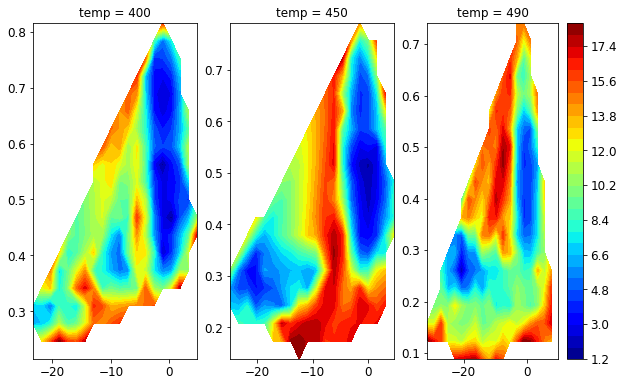

In [100]:
show_images(location_list)

In [219]:
a = '/Users/weilu/Research/server/feb_2018/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550/2d_z_qw/force_0.0/perturbation-1-pmf-610.dat'

In [221]:
aa = np.loadtxt(a)

In [222]:
aa

array([[  0.00000000e+00,  -3.31290000e+01,   8.90000000e-02, ...,
          0.00000000e+00,  -2.33773000e+02,  -2.45538000e+02],
       [  1.00000000e+00,  -3.31290000e+01,   1.14000000e-01, ...,
          0.00000000e+00,  -2.61356000e+02,  -2.79259000e+02],
       [  3.00000000e+01,  -3.14820000e+01,   8.90000000e-02, ...,
          0.00000000e+00,  -2.18722000e+02,  -2.31533000e+02],
       ..., 
       [  8.12000000e+02,   1.13320000e+01,   1.39000000e-01, ...,
          0.00000000e+00,  -2.58081000e+02,  -2.72601000e+02],
       [  8.13000000e+02,   1.13320000e+01,   1.65000000e-01, ...,
          0.00000000e+00,  -2.45600000e+02,  -2.59321000e+02],
       [  8.41000000e+02,   1.29790000e+01,   1.14000000e-01, ...,
          0.00000000e+00,  -2.65472000e+02,  -2.82727000e+02]])

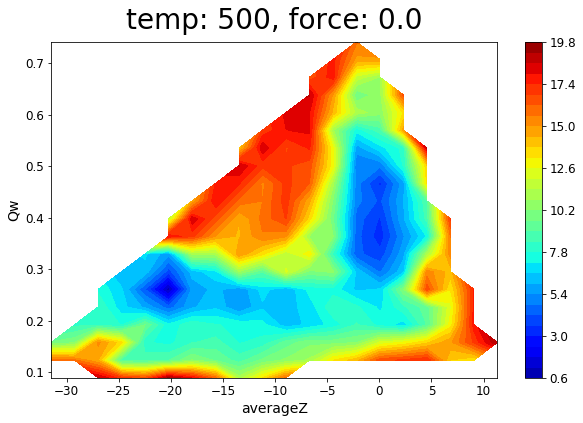

In [136]:
pre = "/Users/weilu/Research/server/feb_2018"
folder = pre + "/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 500
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


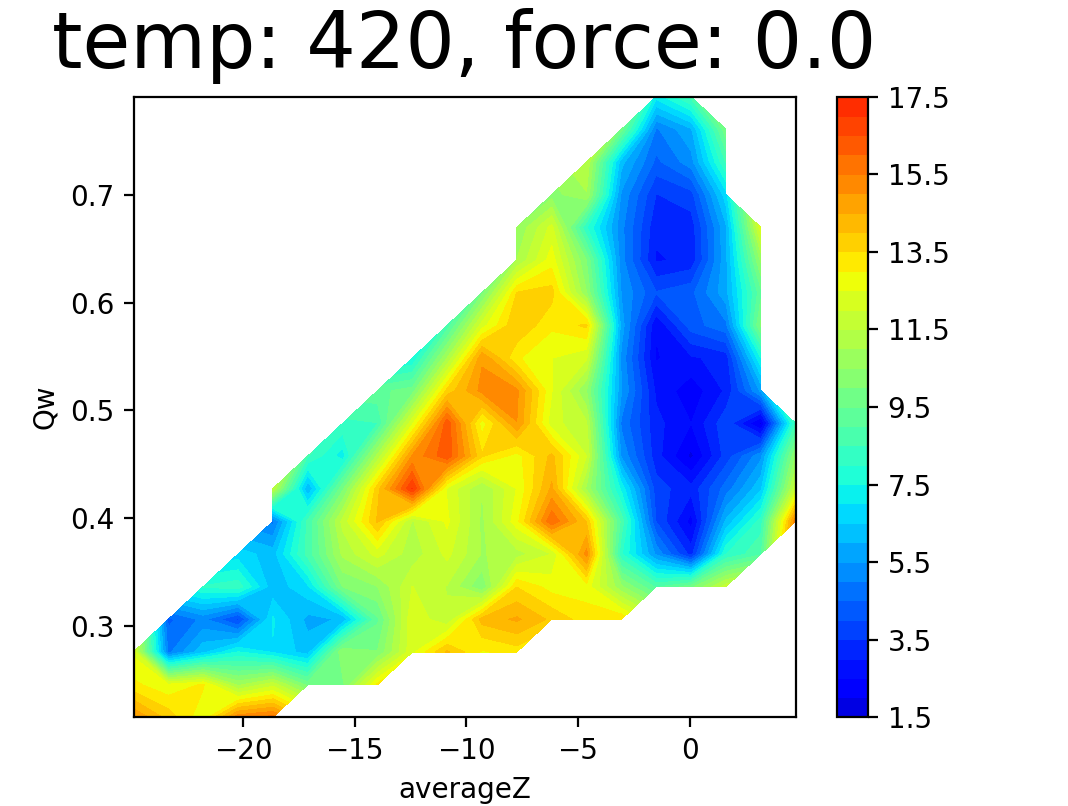

In [17]:
pre = "/Users/weilu/Research/server/feb_2018"
folder = pre + "/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 420
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


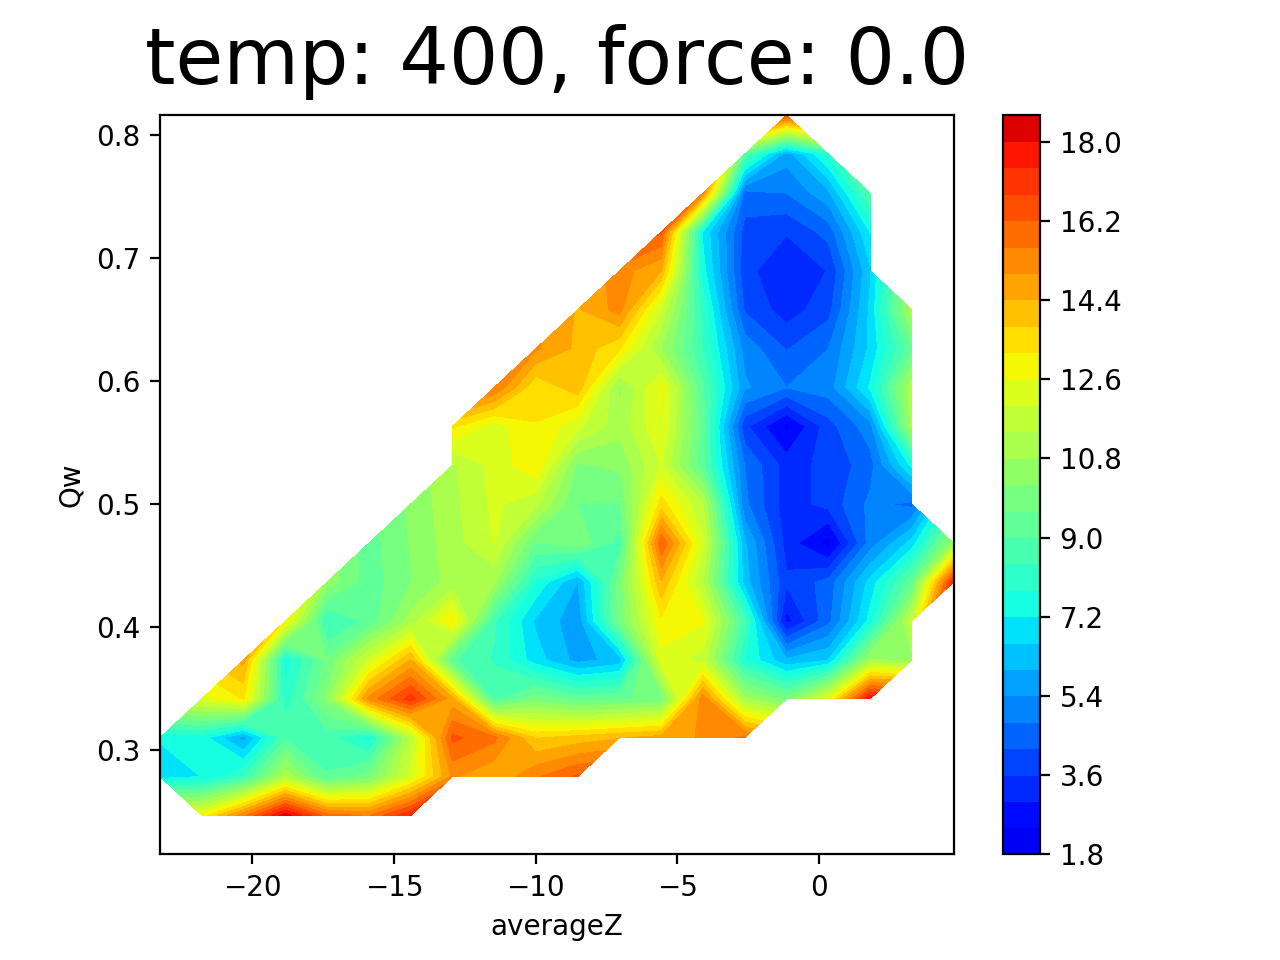

In [10]:
pre = "/Users/weilu/Research/server/feb_2018"
folder = pre + "/week_of_feb12/old_freeEnergy_rg_0.1_lipid_1.0_mem_1_0/rg_0.1_lipid_1.0_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 400
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


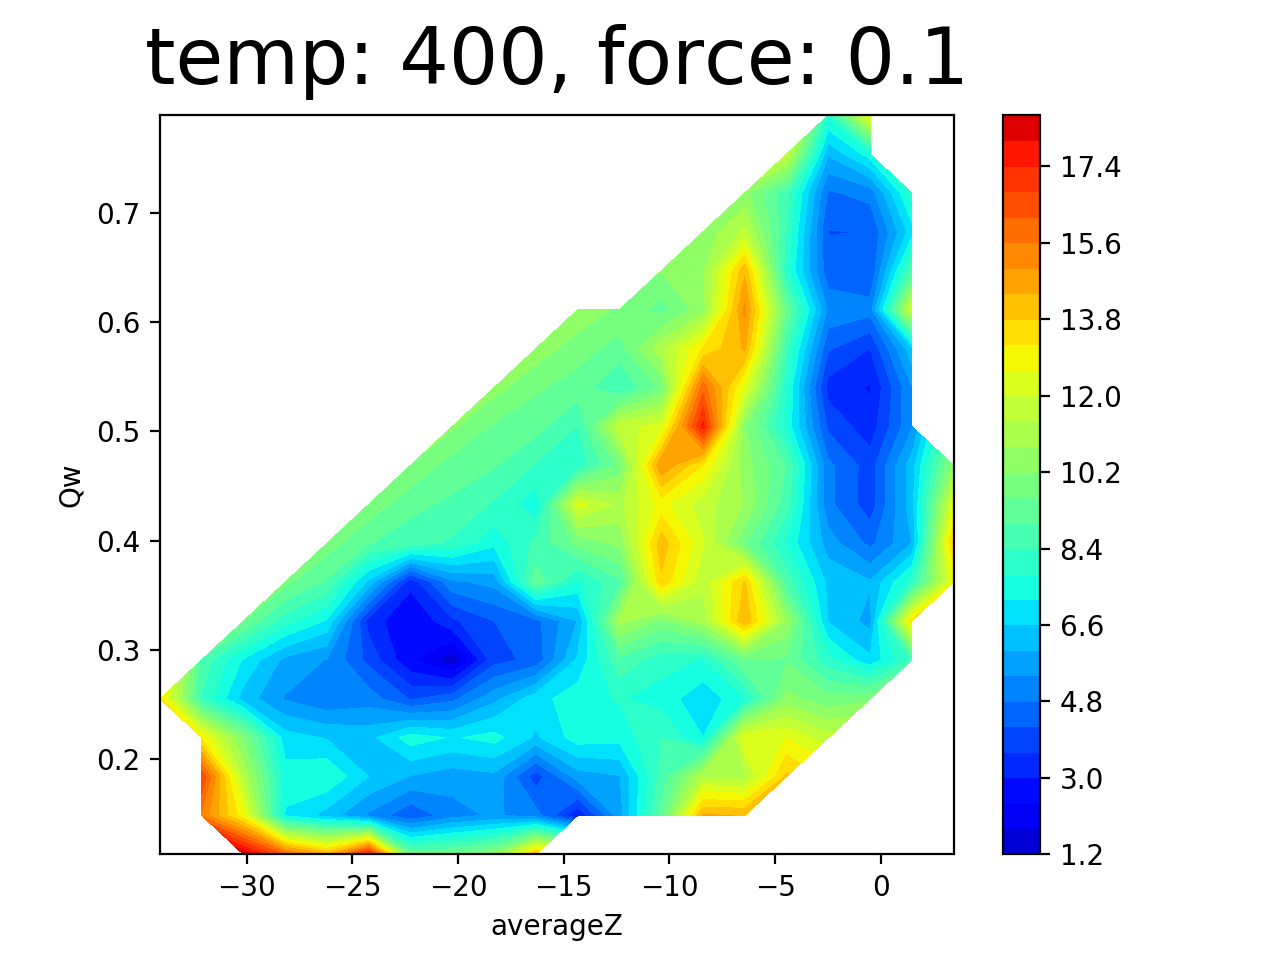

In [49]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.1
temp = 400
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


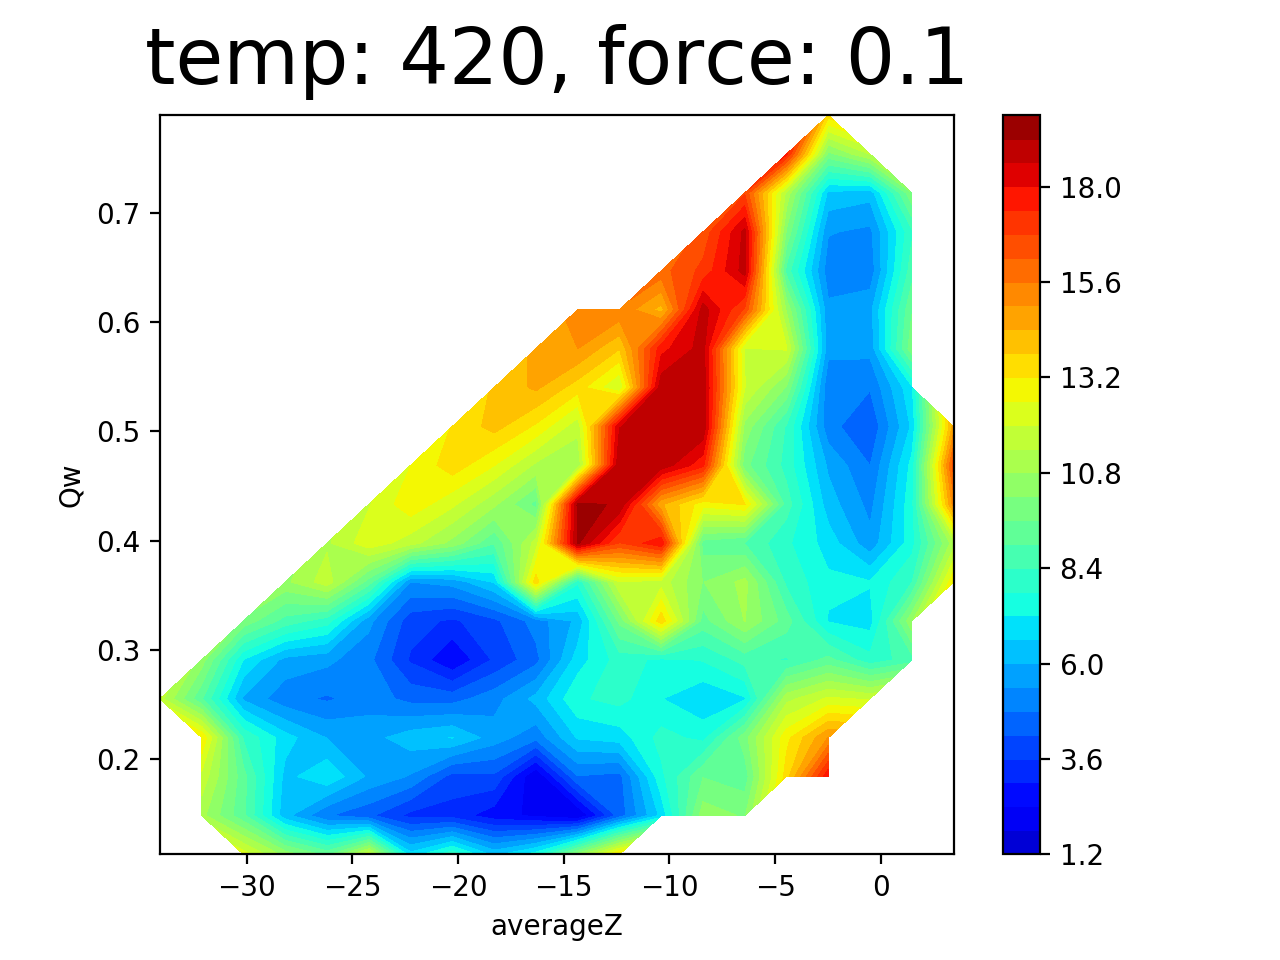

In [50]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.1
temp = 420
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


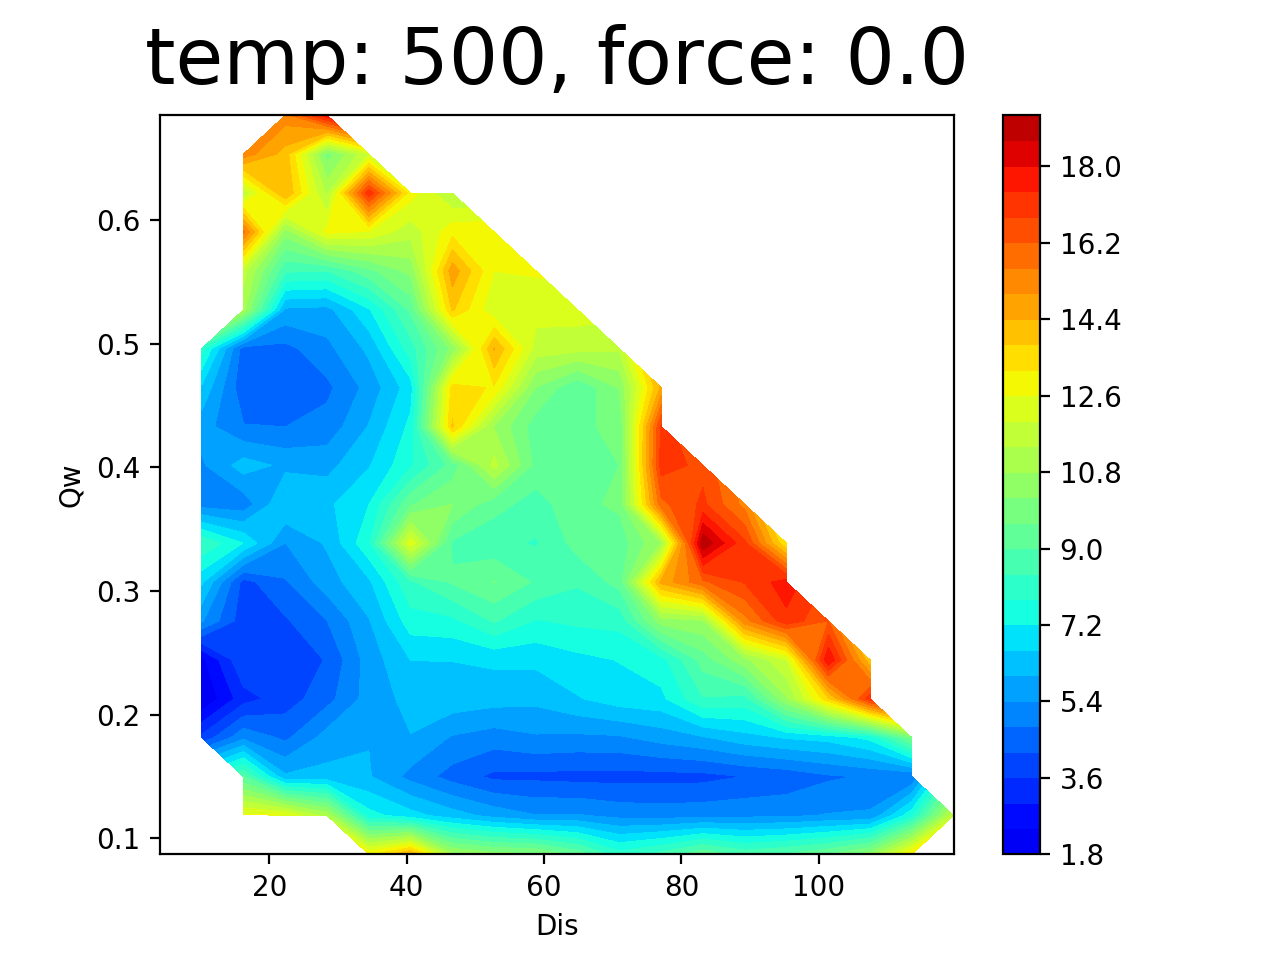

In [45]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "Qw"
y_axis = "Dis"
force = 0.0
temp = 500
name_convertion_dic = {"averageZ":"z", "Qw":"qw", "Dis":"dis"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=y_axis, ylabel=x_axis, title=title)

<IPython.core.display.Javascript object>


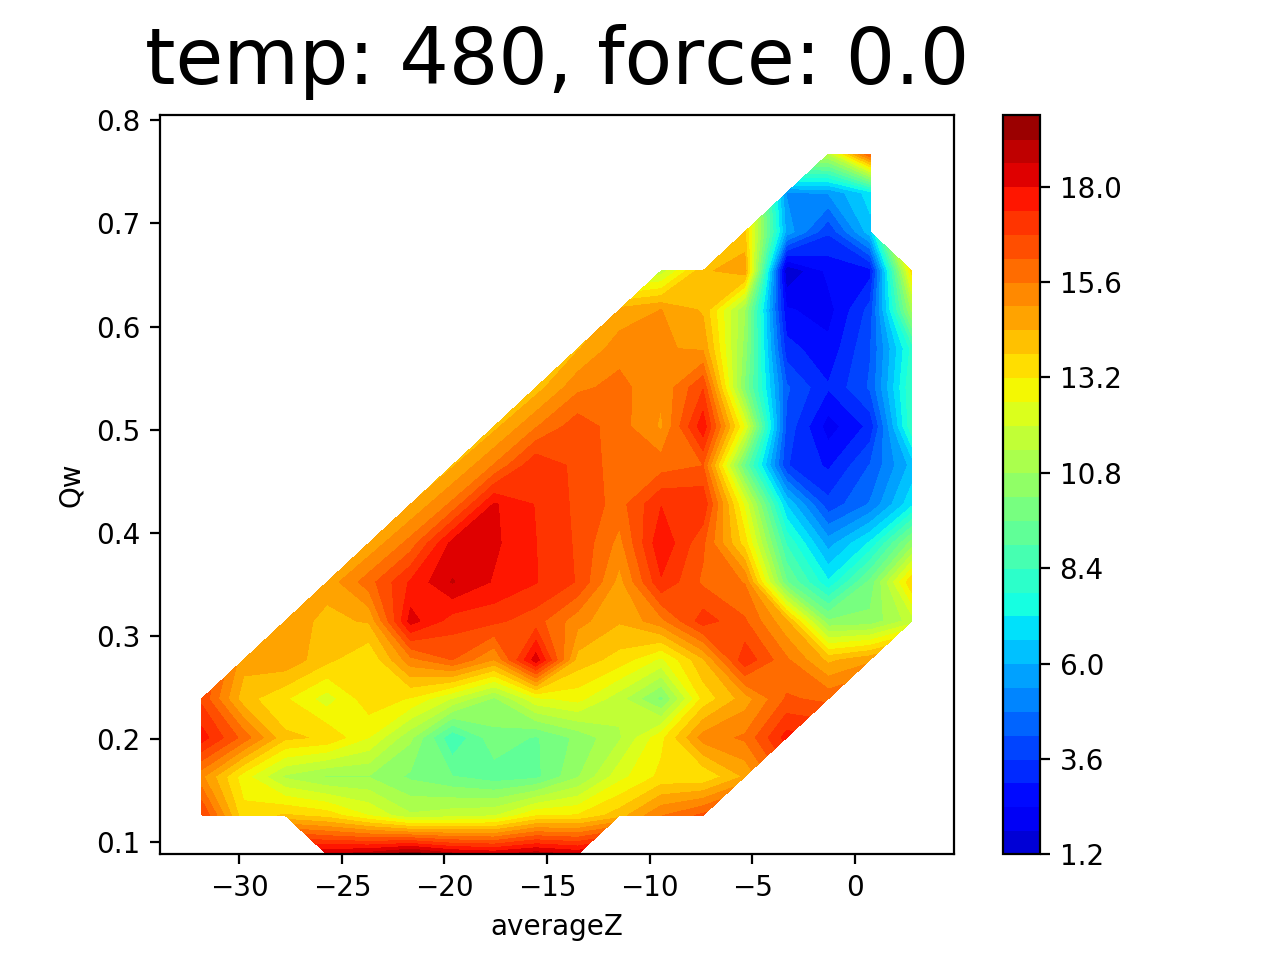

In [86]:
pre = "/Users/weilu/Research/server/jan_2018/week_of_jan22"
folder = pre + "/freeEnergy_rg_0.3_lipid_0.6_mem_1_2/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 480
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title, zmax=20)

<IPython.core.display.Javascript object>


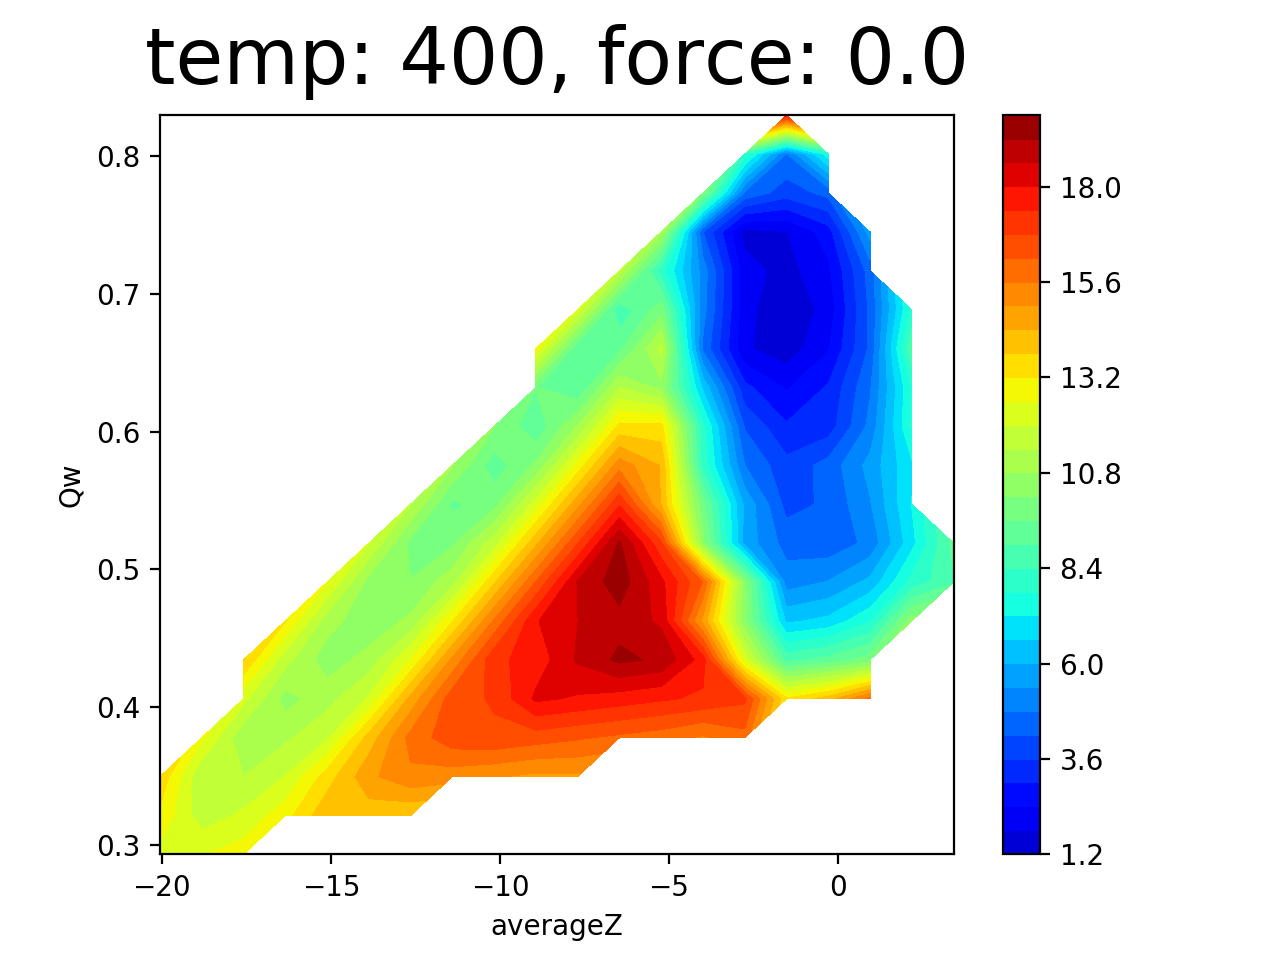

In [48]:
pre = "/Users/weilu/Research/server/jan_2018/week_of_jan22"
folder = pre + "/freeEnergy_rg_0.3_lipid_0.6_mem_1_2/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 400
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/quick_2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


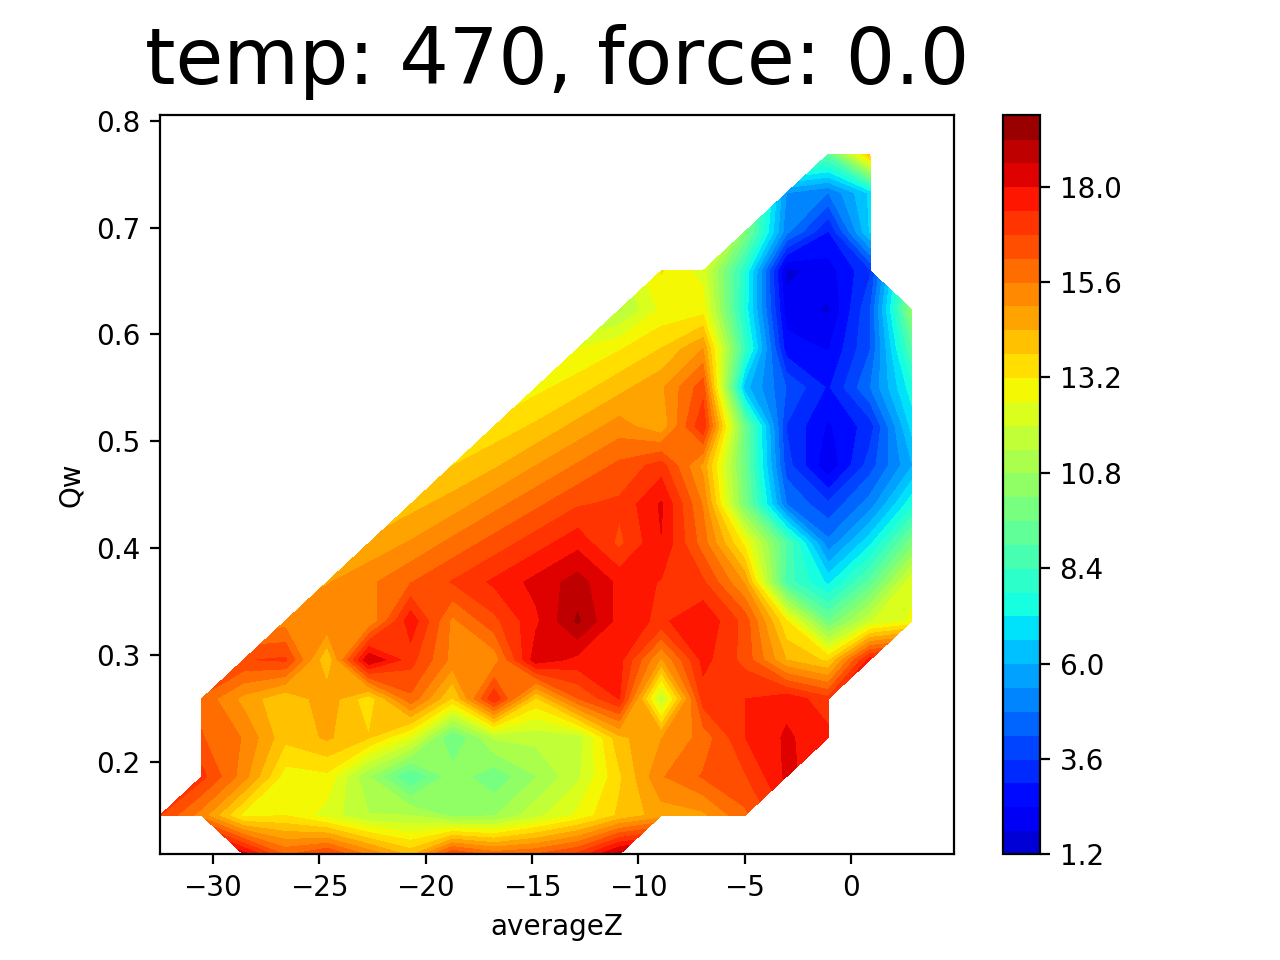

In [52]:
pre = "/Users/weilu/Research/server/jan_2018/week_of_jan22"
folder = pre + "/freeEnergy_rg_0.3_lipid_0.6_mem_1_2/rg_0.3_lipid_0.6_mem_1_350-550"
x_axis = "averageZ"
y_axis = "Qw"
force = 0.0
temp = 470
name_convertion_dic = {"averageZ":"z", "Qw":"qw"}
location = folder + f"/quick_2d_{name_convertion_dic[x_axis]}_{name_convertion_dic[y_axis]}/force_{force}/"
title = f"temp: {temp}, force: {force}"
plot2d(location, temp=temp, xlabel=x_axis, ylabel=y_axis, title=title)

<IPython.core.display.Javascript object>


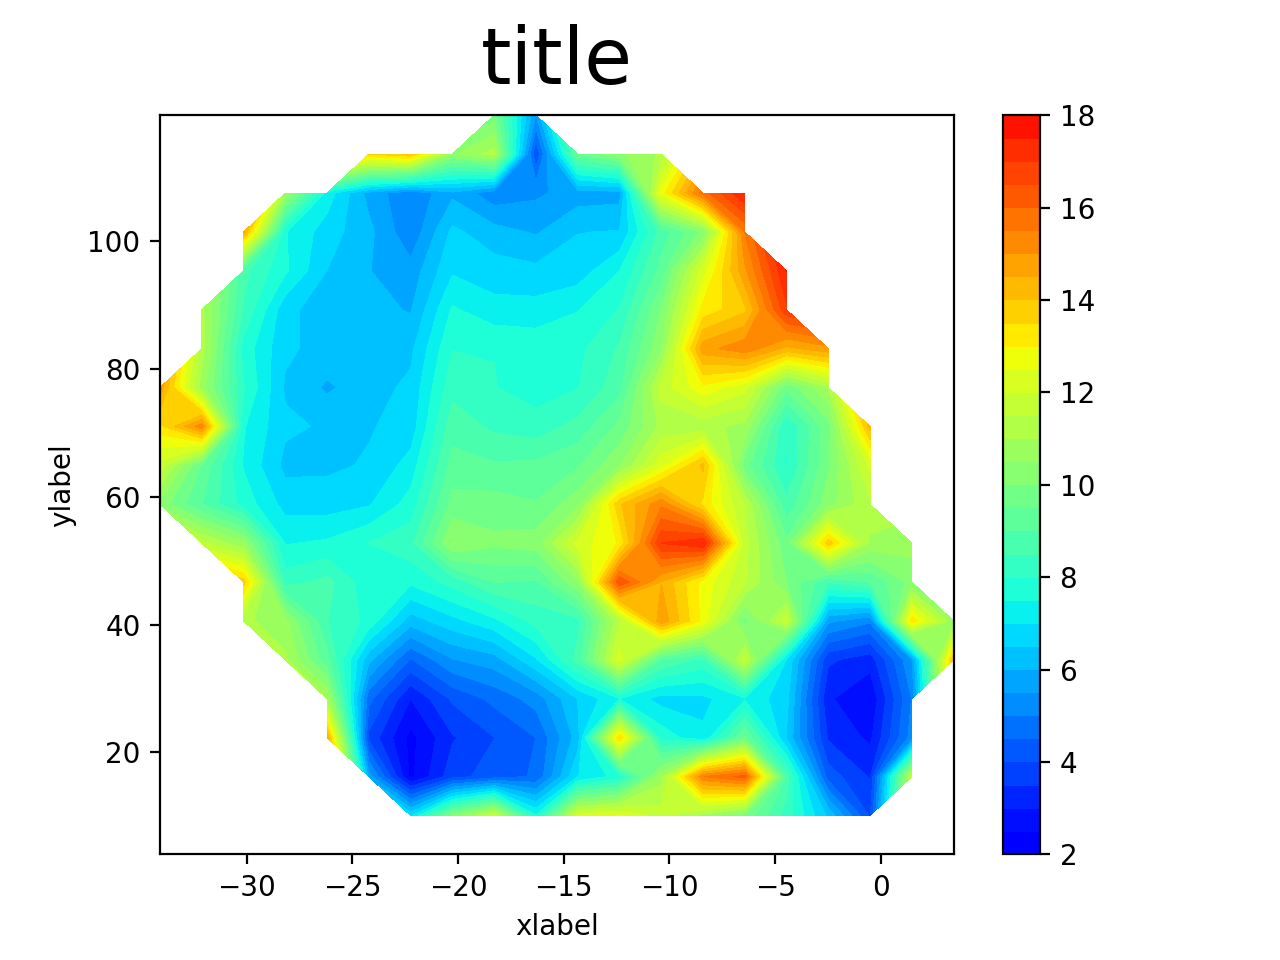

In [16]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
location = folder + "/2d_z_dis/force_0.1/"
plot2d(location, temp=400)

<IPython.core.display.Javascript object>


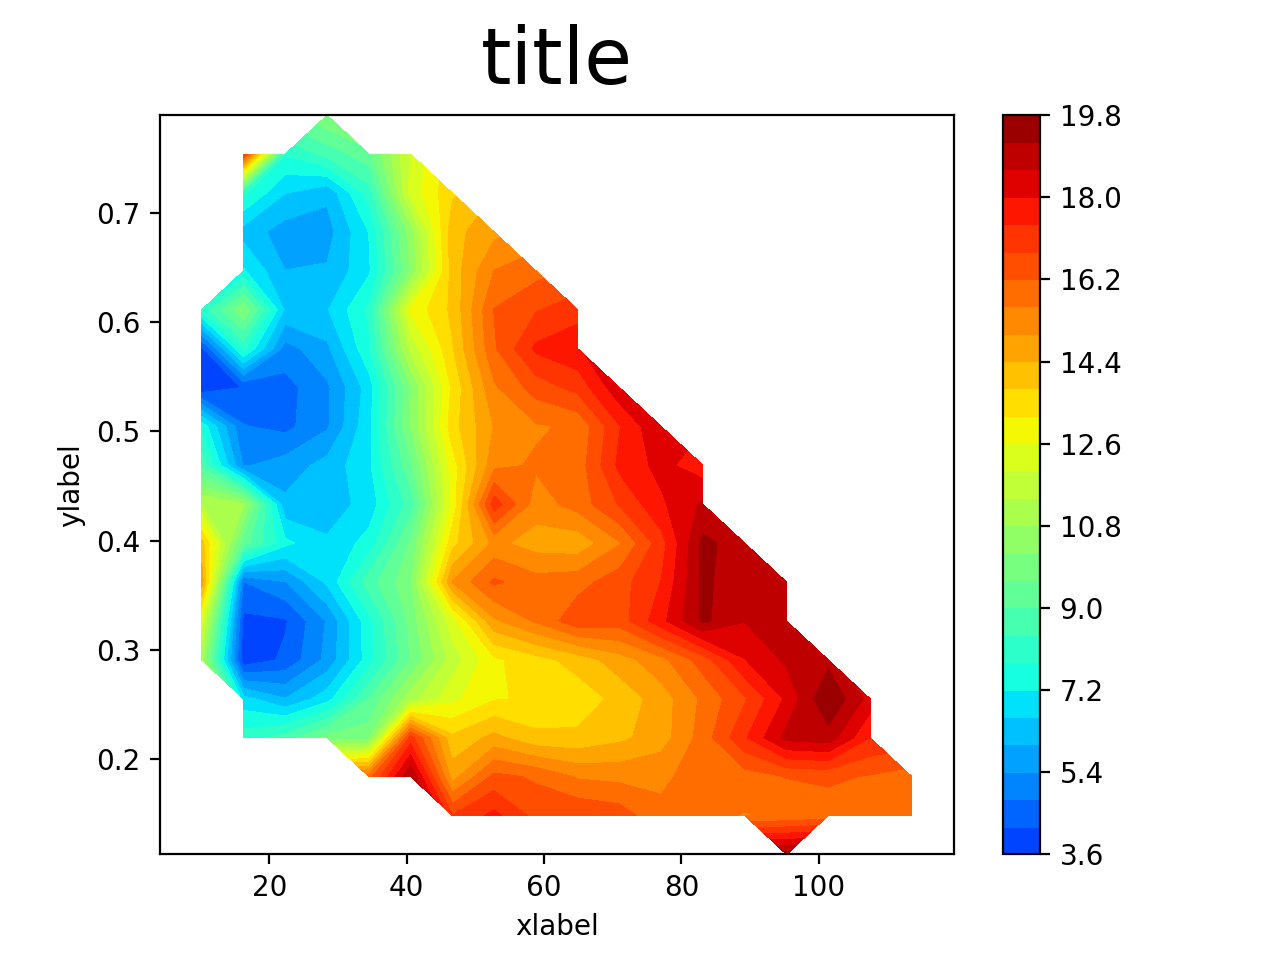

In [6]:
pre = "/Users/weilu/Research/server/jan_2018"
folder = pre + "/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550"
location = folder + "/2d_qw_dis/force_0.0/"
plot2d(location, temp=400)

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.1/"
filename = location + "pmf-400.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
# plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.0/"
filename = location + "pmf-410.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.1/"
filename = location + "pmf-450.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.0/"
filename = location + "pmf-450.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_qw/force_0.0/"
filename = location + "pmf-500.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_dis/force_0.1/"
filename = location + "pmf-400.dat"
xmin, xmax = -40, 10
ymin, ymax = 0, 150
zmin, zmax = 0, 20
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_dis/force_0.0/"
filename = location + "pmf-400.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_z_dis/force_0.0/"
filename = location + "pmf-450.dat"
data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
location = "/Users/weilu/Research/server/jan_2018/ctbp_another_freeEnergy_rg_0.3_lipid_0.6_mem_1_0/rg_0.3_lipid_0.6_mem_1_350-550/2d_qw_dis/force_0.0/"
filename = location + "pmf-450.dat"
xmin, xmax = 0, 120
ymin, ymax = 0, 1
zmin, zmax = 0, 20

data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [ ]:
np.loadtxt(filename).shape